In [1]:
from google.colab import files
uploaded=files.upload()

Saving SocialPopMovement.xls to SocialPopMovement.xls


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

- 시각화 시에 한글 폰트 깨짐 현상을 방지하여 설치 후 다시 재시작해줍니다.

프로젝트 초기 분석
--

In [1]:
import pandas as pd

(df, ) = pd.read_html("SocialPopMovement.xls")

In [2]:
house=pd.DataFrame(df, )

In [3]:
house=house.transpose()

In [4]:
house.head()

0         1         2    ...       622       623       624
구분   전출지 행정구역  _종로구(서울)  _종로구(서울)  _종로구(서울)  ...  _강동구(서울)  _강동구(서울)  _강동구(서울)
     전입지 행정구역  _종로구(서울)   _중구(서울)  _용산구(서울)  ...  _강남구(서울)  _송파구(서울)  _강동구(서울)
1998 이동인구(명)       7203       645       696  ...      1905      7738     32399
1999 이동인구(명)       9943       936       652  ...      2369      9590     46641
2000 이동인구(명)       8939      1177       608  ...      2074      9109     47096

[5 rows x 625 columns]

In [5]:
house.tail()

,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624
2015,이동인구(명),4617,625,526,532,262,789,241,2664,545,253,393,1692,1692,856,190,311,221,64,318,289,316,500,658,320,169,563,4070,987,1967,425,611,261,789,353,205,295,604,549,1054,176,...,889,712,553,1225,550,950,464,190,699,889,1183,2086,6735,39136,6267,204,239,334,844,2103,880,1094,502,321,408,929,556,409,569,351,645,332,168,422,462,675,776,1753,6566,37637
2016,이동인구(명),4145,723,489,497,248,767,280,2512,571,326,380,1303,1694,613,213,366,175,91,313,289,381,479,621,395,187,596,3844,694,2295,374,631,310,645,350,203,315,508,496,619,212,...,868,509,574,830,419,959,425,210,661,826,1092,1744,5484,37505,6630,236,203,273,674,1738,655,883,411,282,306,789,390,344,407,274,613,316,161,379,404,596,549,1250,5716,31043
2017,이동인구(명),4512,541,544,541,209,676,265,2670,572,267,318,1285,1457,596,182,333,161,83,295,245,412,427,502,417,180,693,3338,787,2261,370,584,265,695,349,172,245,369,518,660,212,...,706,552,526,814,427,1006,466,237,798,778,1080,1841,5379,37182,7684,213,232,351,946,2103,777,964,469,257,308,606,371,343,526,297,673,272,152,417,407,579,590,1322,9030,37992
2018,이동인구(명),3807,586,527,497,288,758,241,2129,488,318,320,1202,1430,640,154,321,170,72,379,267,379,470,622,381,154,563,3424,877,1998,369,710,256,689,294,197,301,502,416,651,155,...,766,627,622,891,464,888,454,256,765,894,1215,1787,5322,33018,5234,171,188,238,740,1583,796,723,391,291,248,592,350,254,420,256,524,227,147,383,404,575,569,1073,5149,24240
2019,이동인구(명),3443,607,539,401,281,766,254,2055,485,312,311,1235,1435,657,200,318,153,82,344,279,405,455,624,513,271,454,3191,832,1258,366,584,225,775,286,146,282,444,490,713,155,...,704,581,560,865,501,835,591,252,845,943,1204,1839,6760,44397,8085,145,147,277,498,1278,675,629,486,209,192,509,320,297,390,246,452,258,137,318,375,542,396,1135,5264,27754


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24 entries, ('구분', '전출지 행정구역') to ('2019', '이동인구(명)')
Columns: 625 entries, 0 to 624
dtypes: object(625)
memory usage: 118.2+ KB


구 별로 나누어 주기
--

In [7]:
house=house.transpose()

In [8]:
house

구분              1998    1999  ...    2016    2017    2018    2019
     전출지 행정구역  전입지 행정구역 이동인구(명) 이동인구(명)  ... 이동인구(명) 이동인구(명) 이동인구(명) 이동인구(명)
0    _종로구(서울)  _종로구(서울)    7203    9943  ...    4145    4512    3807    3443
1    _종로구(서울)   _중구(서울)     645     936  ...     723     541     586     607
2    _종로구(서울)  _용산구(서울)     696     652  ...     489     544     527     539
3    _종로구(서울)  _성동구(서울)     834    1035  ...     497     541     497     401
4    _종로구(서울)  _광진구(서울)     529     576  ...     248     209     288     281
..        ...       ...     ...     ...  ...     ...     ...     ...     ...
620  _강동구(서울)  _관악구(서울)     641     811  ...     596     579     575     542
621  _강동구(서울)  _서초구(서울)     813    1093  ...     549     590     569     396
622  _강동구(서울)  _강남구(서울)    1905    2369  ...    1250    1322    1073    1135
623  _강동구(서울)  _송파구(서울)    7738    9590  ...    5716    9030    5149    5264
624  _강동구(서울)  _강동구(서울)   32399   46641  ...   31043   37992   24240   27754

[625 rows x 24 columns]

In [9]:
house.iloc[:, 2:]=house.iloc[:, 2:].values.astype('int')

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   (구분, 전출지 행정구역)   625 non-null    object
 1   (구분, 전입지 행정구역)   625 non-null    object
 2   (1998, 이동인구(명))  625 non-null    int64 
 3   (1999, 이동인구(명))  625 non-null    int64 
 4   (2000, 이동인구(명))  625 non-null    int64 
 5   (2001, 이동인구(명))  625 non-null    int64 
 6   (2002, 이동인구(명))  625 non-null    int64 
 7   (2003, 이동인구(명))  625 non-null    int64 
 8   (2004, 이동인구(명))  625 non-null    int64 
 9   (2005, 이동인구(명))  625 non-null    int64 
 10  (2006, 이동인구(명))  625 non-null    int64 
 11  (2007, 이동인구(명))  625 non-null    int64 
 12  (2008, 이동인구(명))  625 non-null    int64 
 13  (2009, 이동인구(명))  625 non-null    int64 
 14  (2010, 이동인구(명))  625 non-null    int64 
 15  (2011, 이동인구(명))  625 non-null    int64 
 16  (2012, 이동인구(명))  625 non-null    int64 
 17  (2013, 이동인구(명))  625 non-null    in

In [11]:
house['구분','전입지 행정구역'].unique()

array(['_종로구(서울)', '_중구(서울)', '_용산구(서울)', '_성동구(서울)', '_광진구(서울)',
       '_동대문구(서울)', '_중랑구(서울)', '_성북구(서울)', '_강북구(서울)', '_도봉구(서울)',
       '_노원구(서울)', '_은평구(서울)', '_서대문구(서울)', '_마포구(서울)', '_양천구(서울)',
       '_강서구(서울)', '_구로구(서울)', '_금천구(서울)', '_영등포구(서울)', '_동작구(서울)',
       '_관악구(서울)', '_서초구(서울)', '_강남구(서울)', '_송파구(서울)', '_강동구(서울)'],
      dtype=object)

In [12]:
# 종로구, 중구, 용산구 

jongno_in=house.loc[house['구분','전입지 행정구역']=='_종로구(서울)']
jongno_out=house.loc[house['구분','전출지 행정구역']=='_종로구(서울)']
jung_in=house.loc[house['구분','전입지 행정구역']=='_중구(서울)']
jung_out=house.loc[house['구분','전출지 행정구역']=='_중구(서울)']
yongsan_in=house.loc[house['구분','전입지 행정구역']=='_용산구(서울)']
yongsan_out=house.loc[house['구분','전출지 행정구역']=='_용산구(서울)']

In [13]:
# 성동구, 광진구, 동대문구

seongdong_in=house.loc[house['구분','전입지 행정구역']=='_성동구(서울)']
seongdong_out=house.loc[house['구분','전출지 행정구역']=='_성동구(서울)']
gwangjin_in=house.loc[house['구분','전입지 행정구역']=='_광진구(서울)']
gwangjin_out=house.loc[house['구분','전출지 행정구역']=='_광진구(서울)']
dongdaemun_in=house.loc[house['구분','전입지 행정구역']=='_동대문구(서울)']
dongdaemun_out=house.loc[house['구분','전출지 행정구역']=='_동대문구(서울)']

In [14]:
# 중랑구, 성북구, 강북구

jungnang_in=house.loc[house['구분','전입지 행정구역']=='_중랑구(서울)']
jungnang_out=house.loc[house['구분','전출지 행정구역']=='_중랑구(서울)']
seongbuk_in=house.loc[house['구분','전입지 행정구역']=='_성북구(서울)']
seongbuk_out=house.loc[house['구분','전출지 행정구역']=='_성북구(서울)']
gangbuk_in=house.loc[house['구분','전입지 행정구역']=='_강북구(서울)']
gangbuk_out=house.loc[house['구분','전출지 행정구역']=='_강북구(서울)']

In [15]:
# 도봉구, 노원구, 은평구

dobong_in=house.loc[house['구분','전입지 행정구역']=='_도봉구(서울)']
dobong_out=house.loc[house['구분','전출지 행정구역']=='_도봉구(서울)']
nowon_in=house.loc[house['구분','전입지 행정구역']=='_노원구(서울)']
nowon_out=house.loc[house['구분','전출지 행정구역']=='_노원구(서울)']
eunpyeong_in=house.loc[house['구분','전입지 행정구역']=='_은평구(서울)']
eunpyeong_out=house.loc[house['구분','전출지 행정구역']=='_은평구(서울)']

In [16]:
# 서대문구, 마포구, 양천구

seodaemun_in=house.loc[house['구분','전입지 행정구역']=='_서대문구(서울)']
seodaemun_out=house.loc[house['구분','전출지 행정구역']=='_서대문구(서울)']
mapo_in=house.loc[house['구분','전입지 행정구역']=='_마포구(서울)']
mapo_out=house.loc[house['구분','전출지 행정구역']=='_마포구(서울)']
yangcheon_in=house.loc[house['구분','전입지 행정구역']=='_양천구(서울)']
yangcheon_out=house.loc[house['구분','전출지 행정구역']=='_양천구(서울)']

In [17]:
# 강서구, 구로구, 금천구

gangseo_in=house.loc[house['구분','전입지 행정구역']=='_강서구(서울)']
gangseo_out=house.loc[house['구분','전출지 행정구역']=='_강서구(서울)']
guro_in=house.loc[house['구분','전입지 행정구역']=='_구로구(서울)']
guro_out=house.loc[house['구분','전출지 행정구역']=='_구로구(서울)']
geumcheon_in=house.loc[house['구분','전입지 행정구역']=='_금천구(서울)']
geumcheon_out=house.loc[house['구분','전출지 행정구역']=='_금천구(서울)']

In [18]:
# 영등포구, 동작구, 관악구

yeongdeungpo_in=house.loc[house['구분','전입지 행정구역']=='_영등포구(서울)']
yeongdeungpo_out=house.loc[house['구분','전출지 행정구역']=='_영등포구(서울)']
dongjak_in=house.loc[house['구분','전입지 행정구역']=='_동작구(서울)']
dongjak_out=house.loc[house['구분','전출지 행정구역']=='_동작구(서울)']
gwanak_in=house.loc[house['구분','전입지 행정구역']=='_관악구(서울)']
gwanak_out=house.loc[house['구분','전출지 행정구역']=='_관악구(서울)']

In [19]:
# 서초구, 강남구, 송파구, 강동구

seocho_in=house.loc[house['구분','전입지 행정구역']=='_서초구(서울)']
seocho_out=house.loc[house['구분','전출지 행정구역']=='_서초구(서울)']
gangnam_in=house.loc[house['구분','전입지 행정구역']=='_강남구(서울)']
gangnam_out=house.loc[house['구분','전출지 행정구역']=='_강남구(서울)']
songpa_in=house.loc[house['구분','전입지 행정구역']=='_송파구(서울)']
songpa_out=house.loc[house['구분','전출지 행정구역']=='_송파구(서울)']
gangdong_in=house.loc[house['구분','전입지 행정구역']=='_강동구(서울)']
gangdong_out=house.loc[house['구분','전출지 행정구역']=='_강동구(서울)']

강북구를 기준으로 보겠습니다
--

In [20]:
gangbuk_in=gangbuk_in.transpose()

In [21]:
gangbuk_out=gangbuk_out.transpose()

In [22]:
gangbuk_out.iloc[2:,:]=-1*(gangbuk_out.iloc[2:,:].values)

In [23]:
gangbuk=pd.concat([gangbuk_in, gangbuk_out], axis=1)

In [24]:
gangbuk

8         33        58   ...       222       223       224
구분   전출지 행정구역  _종로구(서울)   _중구(서울)  _용산구(서울)  ...  _강북구(서울)  _강북구(서울)  _강북구(서울)
     전입지 행정구역  _강북구(서울)  _강북구(서울)  _강북구(서울)  ...  _강남구(서울)  _송파구(서울)  _강동구(서울)
1998 이동인구(명)        787       401       463  ...      -743      -851      -559
1999 이동인구(명)        833       430       472  ...      -822      -829      -628
2000 이동인구(명)        807       398       441  ...      -719      -790      -570
2001 이동인구(명)        992       546       485  ...      -605      -755      -511
2002 이동인구(명)       1169       702       639  ...      -707      -673      -527
2003 이동인구(명)        941       524       469  ...      -667      -619      -430
2004 이동인구(명)        772       534       450  ...      -665      -591      -459
2005 이동인구(명)        721       440       459  ...      -685      -671      -472
2006 이동인구(명)        692       438       520  ...      -738      -619      -509
2007 이동인구(명)        799       468       462  ...      -623      -710      -471
2008 이동인구(명)        724       516       376  ...      -608      -913      -535
2009 이동인구(명)        695       404       401  ...      -616      -658      -718
2010 이동인구(명)        731       544       474  ...      -518      -568      -464
2011 이동인구(명)        584       392       429  ...      -552      -558      -505
2012 이동인구(명)        698       396       338  ...      -535      -477      -333
2013 이동인구(명)        608       356       366  ...      -570      -454      -359
2014 이동인구(명)        592       310       353  ...      -651      -492      -320
2015 이동인구(명)        545       353       332  ...      -586      -526      -316
2016 이동인구(명)        571       350       355  ...      -419      -462      -357
2017 이동인구(명)        572       349       278  ...      -386      -461      -317
2018 이동인구(명)        488       294       308  ...      -383      -480      -252
2019 이동인구(명)        485       286       331  ...      -402      -473      -338

[24 rows x 50 columns]

In [25]:
gangbuk.iloc[2:, :]=gangbuk.iloc[2:, :].values.astype('int')

In [26]:
gangbuk.iloc[0, 25:]=['종로구(전출)','중구(전출)','용산구(전출)','성동구(전출)','광진구(전출)','동대문구(전출)','중랑구(전출)','성북구(전출)','	강북구(전출)','도봉구(전출)','노원구(전출)','은평구(전출)','서대문구(전출)','마포구(전출)','양천구(전출)','강서구(전출)','구로구(전출)','금천구(전출)','영등포구(전출)','동작구(전출)','관악구(전출)','서초구(전출)','강남구(전출)','송파구(전출)','강동구(전출)']

In [27]:
gangbuk.columns=gangbuk.iloc[0, :]

In [28]:
gangbuk=gangbuk.drop((  '구분', '전입지 행정구역'))

In [29]:
gangbuk=gangbuk.drop((  '구분', '전출지 행정구역'))

In [30]:
gangbuk.index=['1998',
            '1999',
            '2000',
            '2001',
            '2002',
            '2003', 
            '2004',
            '2005', 
            '2006',
            '2007', 
            '2008',
            '2009', 
            '2010', 
            '2011',
            '2012', 
            '2013', 
            '2014', 
            '2015', 
            '2016', 
            '2017',
            '2018', 
            '2019']

In [31]:
g1=gangbuk.values.astype('int')
gangbuk=pd.DataFrame(g1, index=gangbuk.index, columns=gangbuk.columns)

강북구 EDA
--

In [32]:
gangbuk.describe()

"(구분, 전출지 행정구역)",_종로구(서울),_중구(서울),_용산구(서울),_성동구(서울),_광진구(서울),_동대문구(서울),_중랑구(서울),_성북구(서울),_강북구(서울),_도봉구(서울),_노원구(서울),_은평구(서울),_서대문구(서울),_마포구(서울),_양천구(서울),_강서구(서울),_구로구(서울),_금천구(서울),_영등포구(서울),_동작구(서울),_관악구(서울),_서초구(서울),_강남구(서울),_송파구(서울),_강동구(서울),종로구(전출),중구(전출),용산구(전출),성동구(전출),광진구(전출),동대문구(전출),중랑구(전출),성북구(전출),\t강북구(전출),도봉구(전출),노원구(전출),은평구(전출),서대문구(전출),마포구(전출),양천구(전출),강서구(전출),구로구(전출),금천구(전출),영등포구(전출),동작구(전출),관악구(전출),서초구(전출),강남구(전출),송파구(전출),강동구(전출)
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.00000,22.000000,22.000000
mean,718.454545,428.681818,418.227273,720.590909,571.409091,1191.772727,873.090909,6367.954545,19596.681818,5422.818182,2842.818182,572.363636,484.818182,493.772727,275.863636,404.090909,275.545455,154.727273,331.045455,407.545455,510.272727,339.636364,522.181818,533.909091,427.090909,-550.181818,-343.000000,-362.454545,-581.045455,-541.045455,-973.909091,-848.545455,-5203.272727,-19596.681818,-6520.772727,-3313.772727,-651.227273,-446.181818,-491.363636,-328.636364,-509.090909,-323.681818,-172.227273,-349.681818,-415.136364,-521.909091,-400.863636,-600.00000,-619.545455,-452.272727
std,167.812176,100.520733,83.300335,233.031708,142.715387,255.348675,219.321662,1548.180206,4175.618750,1581.037954,892.993555,128.896247,157.105556,118.990168,82.377930,85.312261,75.522767,34.265326,81.577003,111.911839,94.656362,87.483084,110.258414,164.546681,116.088599,143.857614,110.137144,88.202002,181.765280,132.673059,240.103134,173.026210,1141.215692,4175.618750,1651.671965,1275.374116,128.412999,133.723822,117.748540,95.648436,79.506160,79.167325,36.488657,77.846850,102.442688,74.512964,102.501241,122.08506,140.921365,117.426849
min,485.000000,286.000000,278.000000,380.000000,354.000000,832.000000,600.000000,3969.000000,12253.000000,3045.000000,1687.000000,392.000000,295.000000,307.000000,142.000000,282.000000,155.000000,101.000000,215.000000,245.000000,386.000000,225.000000,317.000000,293.000000,209.000000,-835.000000,-641.000000,-531.000000,-1089.000000,-857.000000,-1435.000000,-1303.000000,-7335.000000,-28627.000000,-9092.000000,-6506.000000,-876.000000,-761.000000,-713.000000,-509.000000,-636.000000,-483.000000,-257.000000,-513.000000,-680.000000,-671.000000,-615.000000,-822.00000,-913.000000,-718.000000
25%,586.000000,353.750000,353.500000,530.000000,445.000000,984.000000,676.500000,5283.250000,16985.500000,4149.250000,2098.250000,457.250000,338.250000,397.500000,190.250000,343.750000,201.750000,130.500000,274.250000,315.000000,430.500000,269.500000,444.250000,385.000000,346.500000,-639.750000,-377.250000,-421.500000,-698.750000,-622.500000,-1163.250000,-927.500000,-5919.000000,-22981.000000,-7744.000000,-3981.250000,-751.250000,-552.500000,-590.750000,-394.250000,-580.750000,-374.750000,-185.750000,-414.250000,-468.500000,-582.000000,-455.750000,-680.50000,-700.750000,-523.000000
50%,709.500000,402.500000,435.000000,701.000000,566.500000,1190.000000,859.000000,5981.000000,18468.000000,5533.000000,2767.500000,579.500000,498.500000,516.500000,297.500000,397.000000,288.000000,154.500000,338.500000,416.000000,489.500000,345.000000,521.500000,546.500000,434.500000,-569.500000,-335.500000,-360.000000,-511.000000,-496.500000,-900.500000,-852.000000,-5053.500000,-18468.000000,-6201.500000,-3097.000000,-666.500000,-392.000000,-515.000000,-368.000000,-503.500000,-347.500000,-176.000000,-353.000000,-431.500000,-507.500000,-415.000000,-612.00000,-605.000000,-467.500000
75%,796.000000,504.000000,467.500000,831.500000,665.500000,1321.000000,988.500000,7283.500000,22981.000000,6199.500000,3298.500000,671.500000,5

In [33]:
gangbuk[['강북구(전출)']]=gangbuk[['\t강북구(전출)']]

In [34]:
gangbuk.drop(['\t강북구(전출)'], axis=1, inplace=True)

In [35]:
gangbuk=gangbuk[['_종로구(서울)', '_중구(서울)', '_용산구(서울)', '_성동구(서울)', '_광진구(서울)', '_동대문구(서울)',
       '_중랑구(서울)', '_성북구(서울)', '_강북구(서울)', '_도봉구(서울)', '_노원구(서울)', '_은평구(서울)',
       '_서대문구(서울)', '_마포구(서울)', '_양천구(서울)', '_강서구(서울)', '_구로구(서울)', '_금천구(서울)',
       '_영등포구(서울)', '_동작구(서울)', '_관악구(서울)', '_서초구(서울)', '_강남구(서울)', '_송파구(서울)',
       '_강동구(서울)', '종로구(전출)', '중구(전출)', '용산구(전출)', '성동구(전출)', '광진구(전출)',
       '동대문구(전출)', '중랑구(전출)', '성북구(전출)',  '강북구(전출)', '도봉구(전출)', '노원구(전출)', '은평구(전출)',
       '서대문구(전출)', '마포구(전출)', '양천구(전출)', '강서구(전출)', '구로구(전출)', '금천구(전출)',
       '영등포구(전출)', '동작구(전출)', '관악구(전출)', '서초구(전출)', '강남구(전출)', '송파구(전출)',
       '강동구(전출)']]

In [36]:
gangbuk['종로구(편차)']=(gangbuk['_종로구(서울)'].values+gangbuk['종로구(전출)'])
gangbuk['중구(편차)']=(gangbuk['_중구(서울)'].values+gangbuk['중구(전출)'])
gangbuk['용산구(편차)']=(gangbuk['_용산구(서울)'].values+gangbuk['용산구(전출)'])
gangbuk['성동구(편차)']=(gangbuk['_성동구(서울)'].values+gangbuk['성동구(전출)'])
gangbuk['광진구(편차)']=(gangbuk['_광진구(서울)'].values+gangbuk['광진구(전출)'])
gangbuk['동대문구(편차)']=(gangbuk['_동대문구(서울)'].values+gangbuk['동대문구(전출)'])
gangbuk['중랑구(편차)']=(gangbuk['_중랑구(서울)'].values+gangbuk['중랑구(전출)'])
gangbuk['성북구(편차)']=(gangbuk['_성북구(서울)'].values+gangbuk['성북구(전출)'])
gangbuk['강북구(편차)']=(gangbuk['_강북구(서울)'].values+gangbuk['강북구(전출)'])
gangbuk['도봉구(편차)']=(gangbuk['_도봉구(서울)'].values+gangbuk['도봉구(전출)'])
gangbuk['노원구(편차)']=(gangbuk['_노원구(서울)'].values+gangbuk['노원구(전출)'])
gangbuk['은평구(편차)']=(gangbuk['_은평구(서울)'].values+gangbuk['은평구(전출)'])
gangbuk['서대문구(편차)']=(gangbuk['_서대문구(서울)'].values+gangbuk['서대문구(전출)'])
gangbuk['마포구(편차)']=(gangbuk['_마포구(서울)'].values+gangbuk['마포구(전출)'])
gangbuk['양천구(편차)']=(gangbuk['_양천구(서울)'].values+gangbuk['양천구(전출)'])
gangbuk['강서구(편차)']=(gangbuk['_강서구(서울)'].values+gangbuk['강서구(전출)'])
gangbuk['구로구(편차)']=(gangbuk['_구로구(서울)'].values+gangbuk['구로구(전출)'])
gangbuk['금천구(편차)']=(gangbuk['_금천구(서울)'].values+gangbuk['금천구(전출)'])
gangbuk['영등포구(편차)']=(gangbuk['_영등포구(서울)'].values+gangbuk['영등포구(전출)'])
gangbuk['동작구(편차)']=(gangbuk['_동작구(서울)'].values+gangbuk['동작구(전출)'])
gangbuk['관악구(편차)']=(gangbuk['_관악구(서울)'].values+gangbuk['관악구(전출)'])
gangbuk['서초구(편차)']=(gangbuk['_서초구(서울)'].values+gangbuk['서초구(전출)'])
gangbuk['강남구(편차)']=(gangbuk['_강남구(서울)'].values+gangbuk['강남구(전출)'])
gangbuk['송파구(편차)']=(gangbuk['_송파구(서울)'].values+gangbuk['송파구(전출)'])
gangbuk['강동구(편차)']=(gangbuk['_강동구(서울)'].values+gangbuk['강동구(전출)'])

년도별로 구별로 전입과 전출 편차 비교하여 보기
--

[Text(0, 0.5, '성동구'), Text(0.5, 1.0, 'year')]

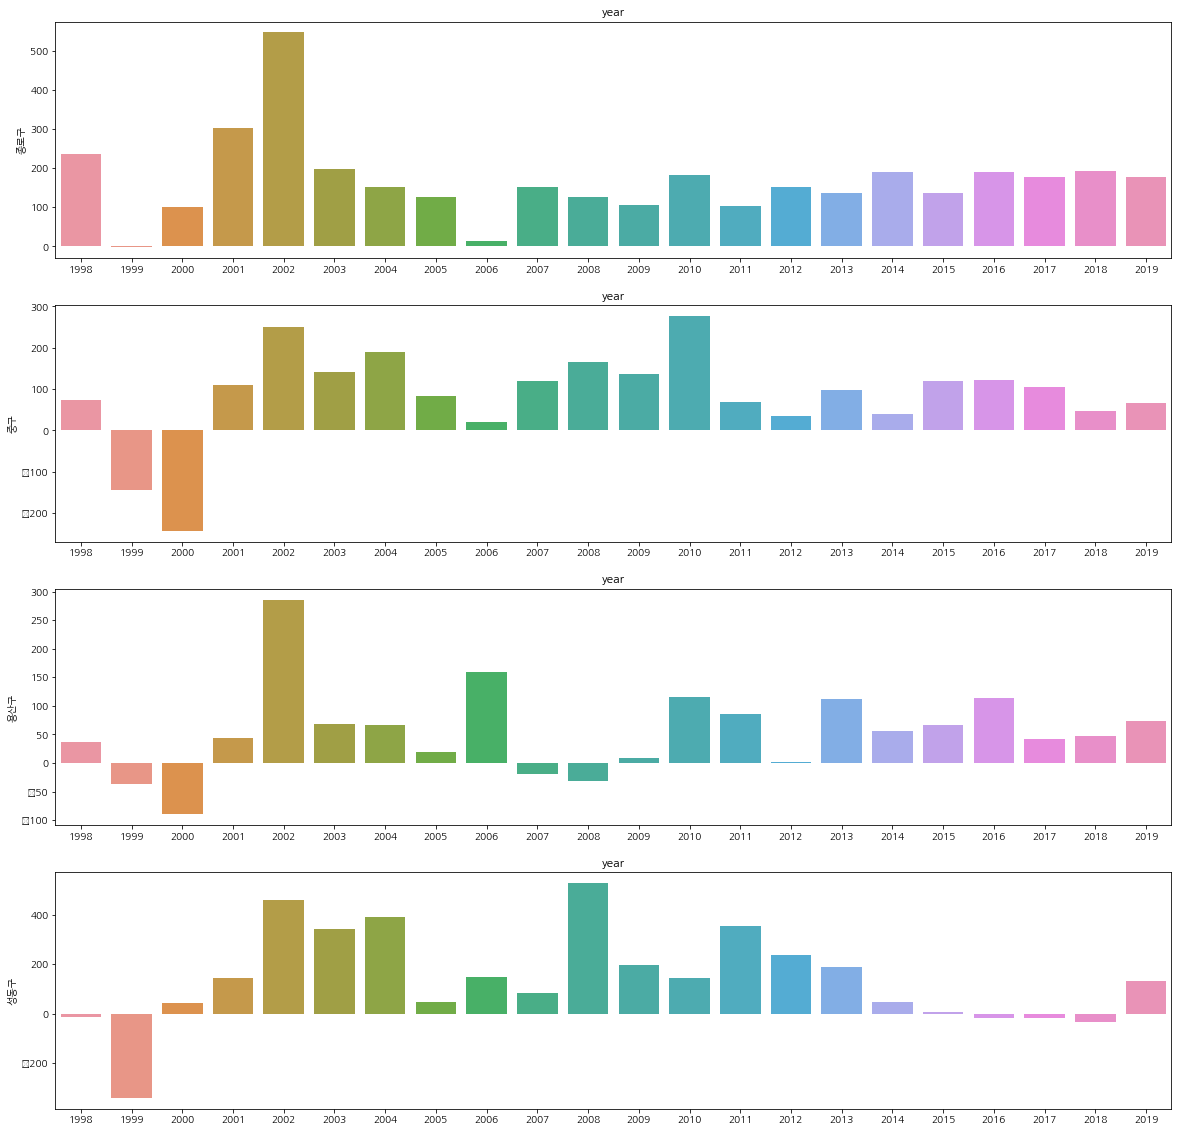

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1),(ax2),(ax3),(ax4)) =plt.subplots(nrows=4,ncols=1)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=gangbuk, x=gangbuk.index, y="종로구(편차)", ax=ax1)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="중구(편차)", ax=ax2)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="용산구(편차)", ax=ax3)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="성동구(편차)", ax=ax4)
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_style("darkgrid")
ax1.set(ylabel='종로구', title ="year")
ax2.set(ylabel='중구', title ="year")
ax3.set(ylabel='용산구', title ="year")
ax4.set(ylabel='성동구', title ="year")

- 시간의 흐름에 따라 종로구의 경우는 전입이 더 많고, 중구의 경우는 2010년을 제외하고는 전출이 더 많았으며, 
용산구의 경우는 2002년과 2017년을 제외하고 전출이 많았고, 성동구의 경우는 1999년을 제외하고 전입이 더 많았다.

[Text(0, 0.5, '성북구'), Text(0.5, 1.0, 'year')]

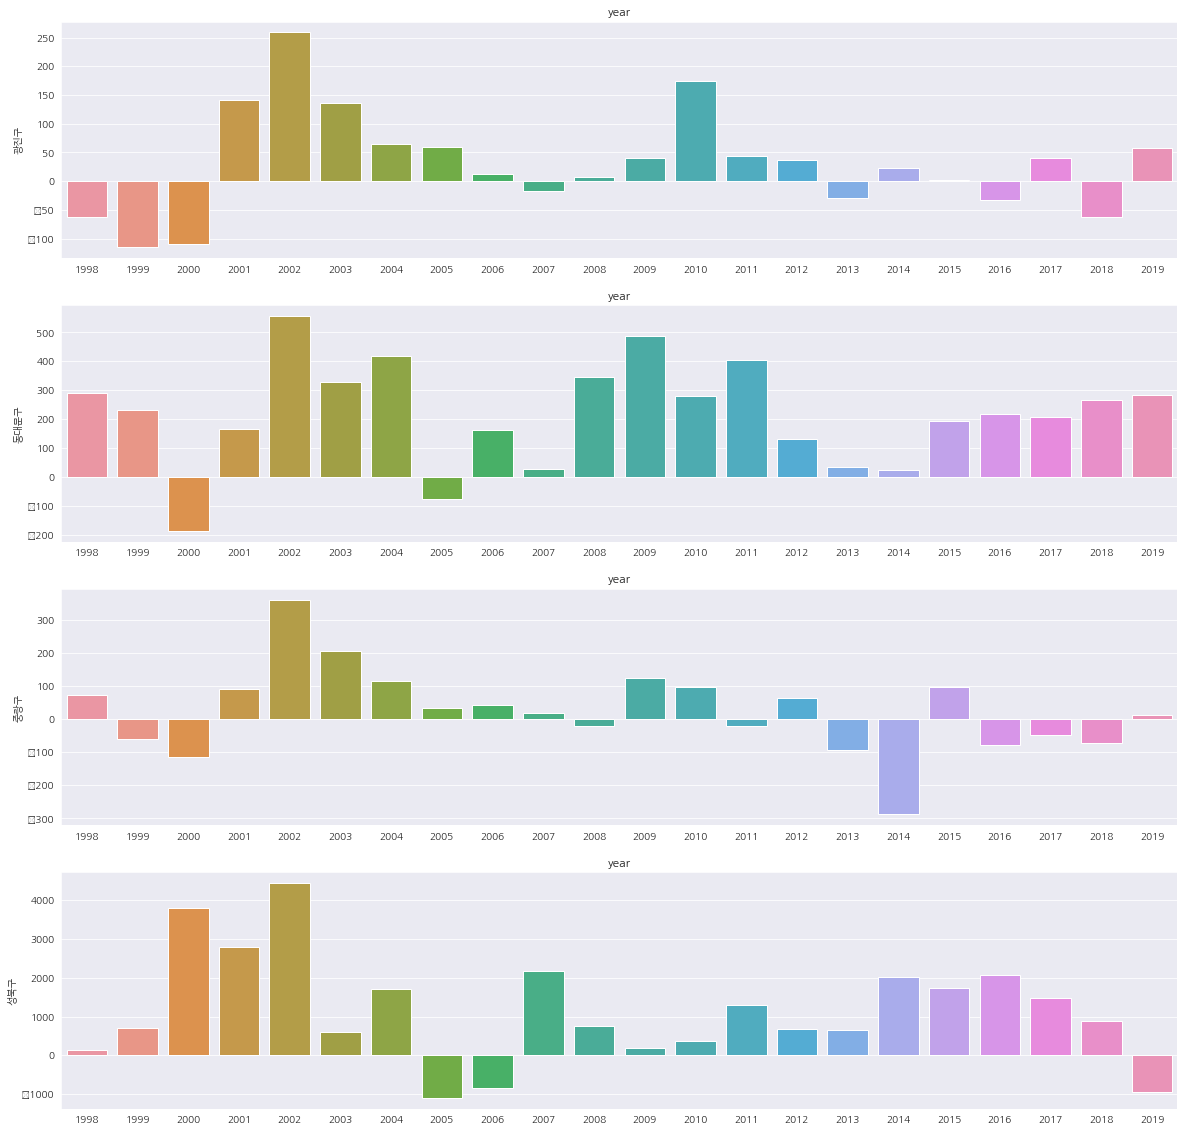

In [38]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1),(ax2),(ax3),(ax4)) =plt.subplots(nrows=4,ncols=1)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=gangbuk, x=gangbuk.index, y="광진구(편차)", ax=ax1)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="동대문구(편차)", ax=ax2)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="중랑구(편차)", ax=ax3)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="성북구(편차)", ax=ax4)
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_style("darkgrid")
ax1.set(ylabel='광진구', title ="year")
ax2.set(ylabel='동대문구', title ="year")
ax3.set(ylabel='중랑구', title ="year")
ax4.set(ylabel='성북구', title ="year")

- 광진구의 경우에는 1998~2000, 2013,2016,2018년을 제외하고 전입인원이 더 많았고,

동대문구의 경우에는 2000년을 제외하고 전입인원이 많았으며,

중랑구의 경우에는 1999년, 2000년, 2014년, 2016~2018년을 제외하고 전입인원이 더

많았으며, 성북구의 경우에는 2005~2005년, 2019년을 제외하고

 전입인원이 더 많았습니다.

[Text(0, 0.5, '은평구'), Text(0.5, 1.0, 'year')]

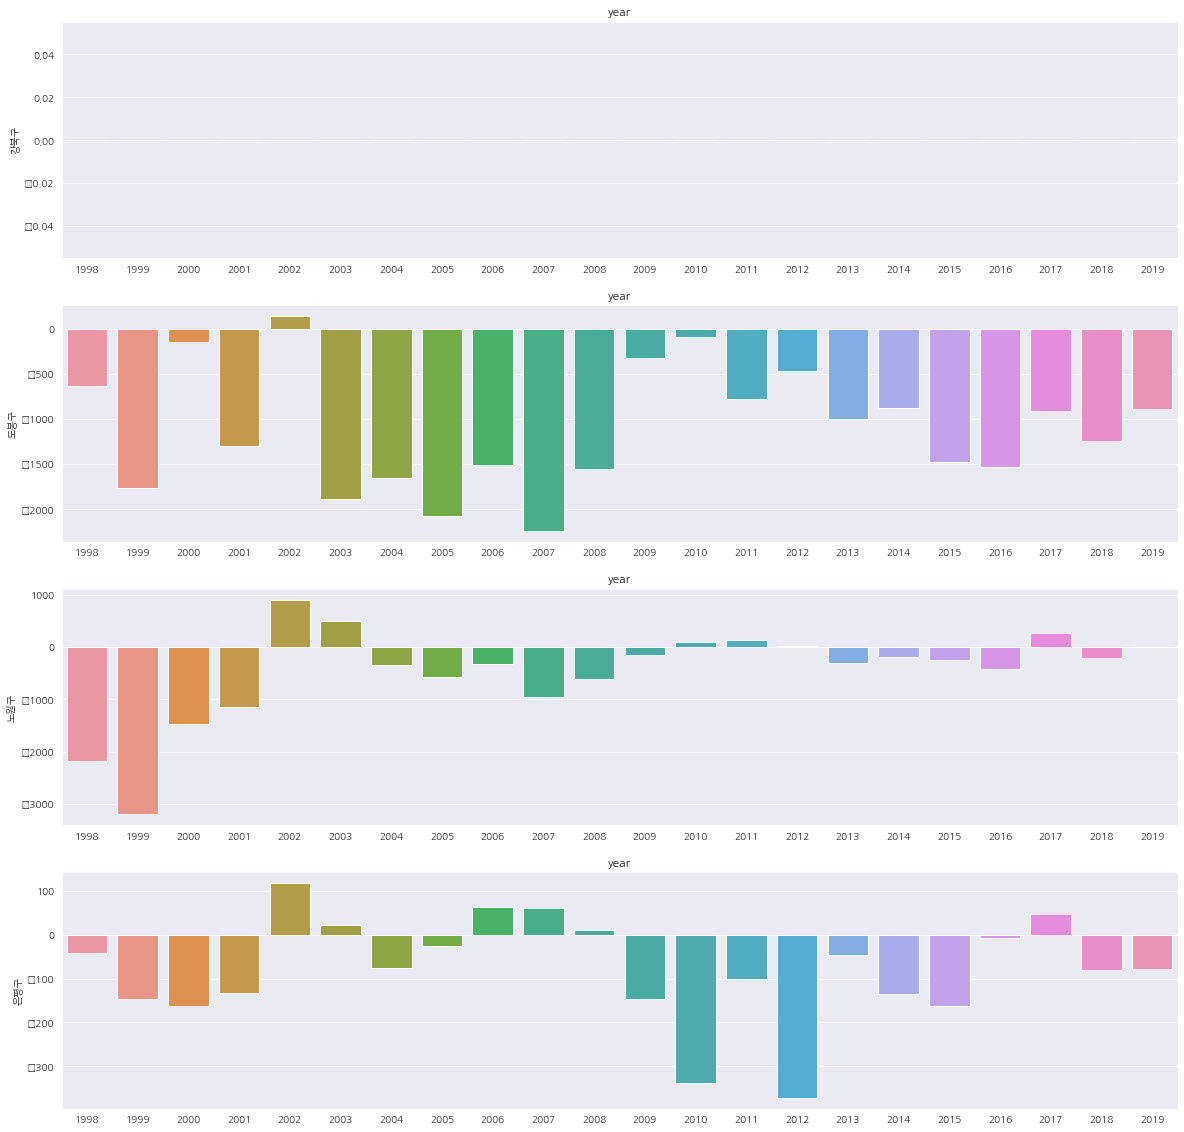

In [39]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1),(ax2),(ax3),(ax4)) =plt.subplots(nrows=4,ncols=1)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=gangbuk, x=gangbuk.index, y="강북구(편차)", ax=ax1)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="도봉구(편차)", ax=ax2)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="노원구(편차)", ax=ax3)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="은평구(편차)", ax=ax4)
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_style("darkgrid")
ax1.set(ylabel='강북구', title ="year")
ax2.set(ylabel='도봉구', title ="year")
ax3.set(ylabel='노원구', title ="year")
ax4.set(ylabel='은평구', title ="year")

- 강북구의 경우에는 전입과 전출 매년 같았으며,

도봉구의 경우에는 2002년을 제외하고는 대부분 전출이 많았고, 

노원구의 경우에도 2002년을 제외하고 대부분 전출이 많았으며,

은평구의 경우에도 2002년, 2003년, 2006년, 2007년, 2017년을 제외하고는 전출이 많았습니다.

[Text(0, 0.5, '강서구'), Text(0.5, 1.0, 'year')]

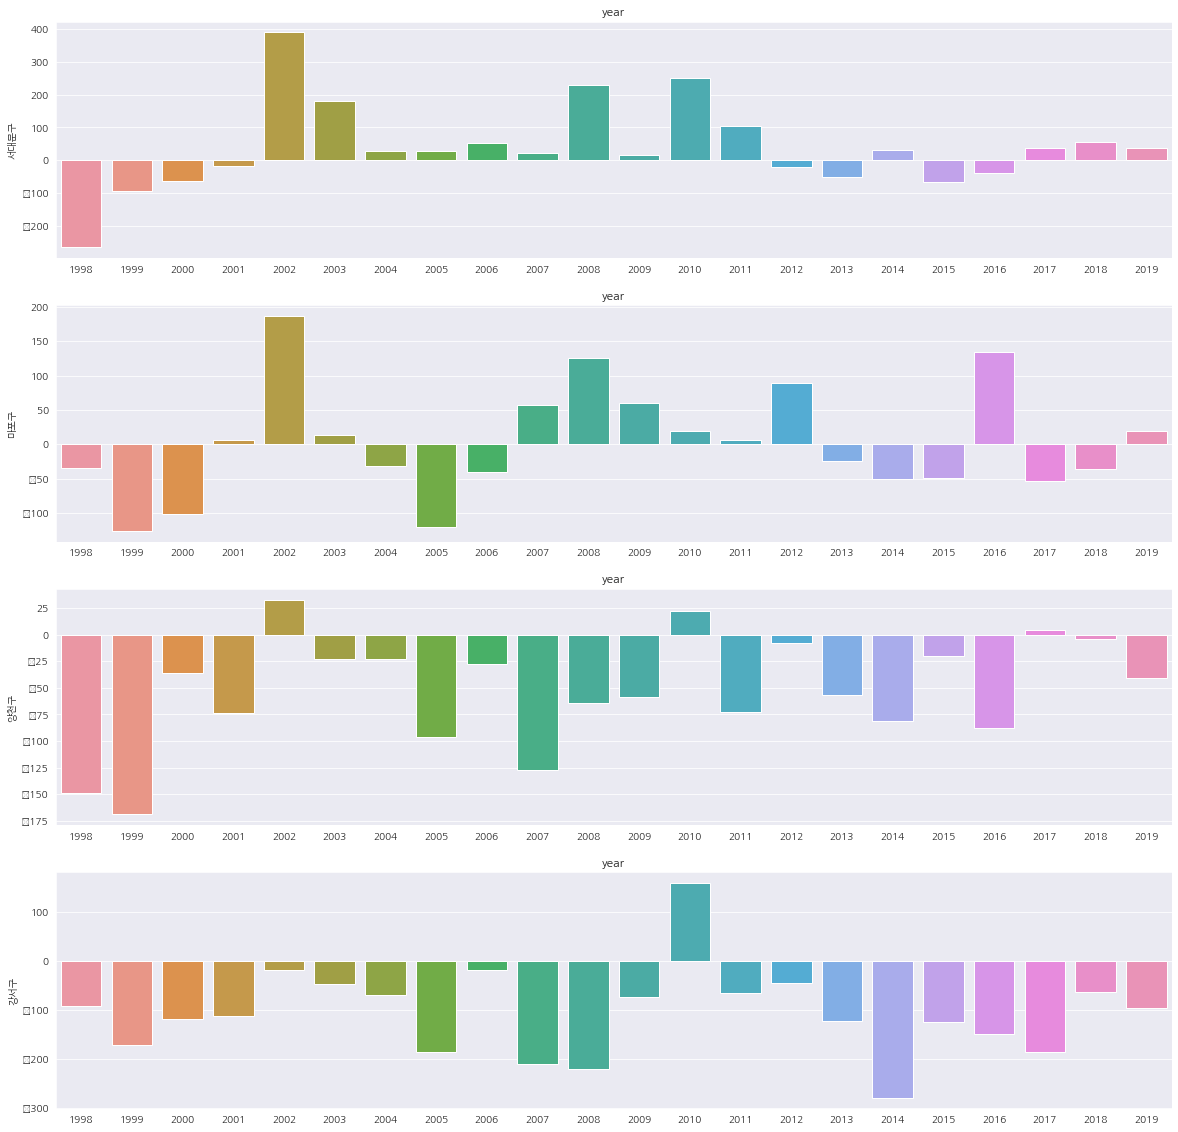

In [40]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1),(ax2),(ax3),(ax4)) =plt.subplots(nrows=4,ncols=1)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=gangbuk, x=gangbuk.index, y="서대문구(편차)", ax=ax1)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="마포구(편차)", ax=ax2)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="양천구(편차)", ax=ax3)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="강서구(편차)", ax=ax4)
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_style("darkgrid")
ax1.set(ylabel='서대문구', title ="year")
ax2.set(ylabel='마포구', title ="year")
ax3.set(ylabel='양천구', title ="year")
ax4.set(ylabel='강서구', title ="year")

- 서대문구의 경우에는 전입이 대부분 더 많았으며,

마포구는 전출이 더 많았고, 

양천구의 경우에는 2002년과 2010년을 제외하고는 전출이 더 많았고, 

강서구의 경우에는 2010년을 제외하고는 전출이 더 많았습니다.

[Text(0, 0.5, '동작구'), Text(0.5, 1.0, 'year')]

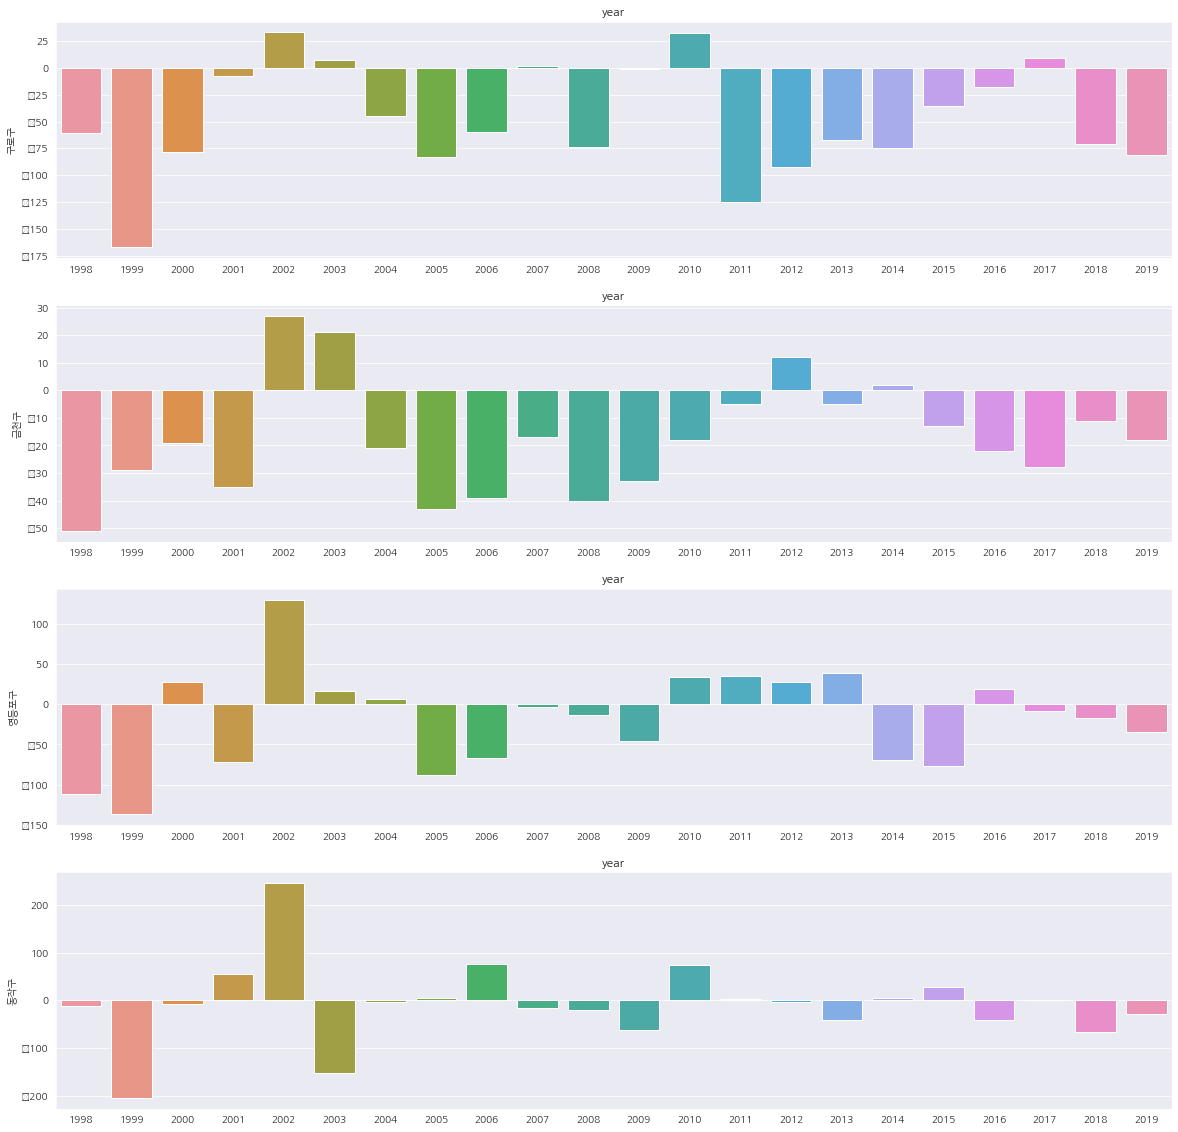

In [41]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1),(ax2),(ax3),(ax4)) =plt.subplots(nrows=4,ncols=1)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=gangbuk, x=gangbuk.index, y="구로구(편차)", ax=ax1)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="금천구(편차)", ax=ax2)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="영등포구(편차)", ax=ax3)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="동작구(편차)", ax=ax4)
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_style("darkgrid")
ax1.set(ylabel='구로구', title ="year")
ax2.set(ylabel='금천구', title ="year")
ax3.set(ylabel='영등포구', title ="year")
ax4.set(ylabel='동작구', title ="year")

구로구, 금천구, 영등포구, 동작구 대부분 전출이 많았는데, 특히 동작구의 경우에는 99년 01년, 03년을 제외하면 전입량과 전출량이 차이가 거의 없는 것을 확인 할 수 있습니다.

[Text(0, 0.5, '강동구'), Text(0.5, 1.0, 'year')]

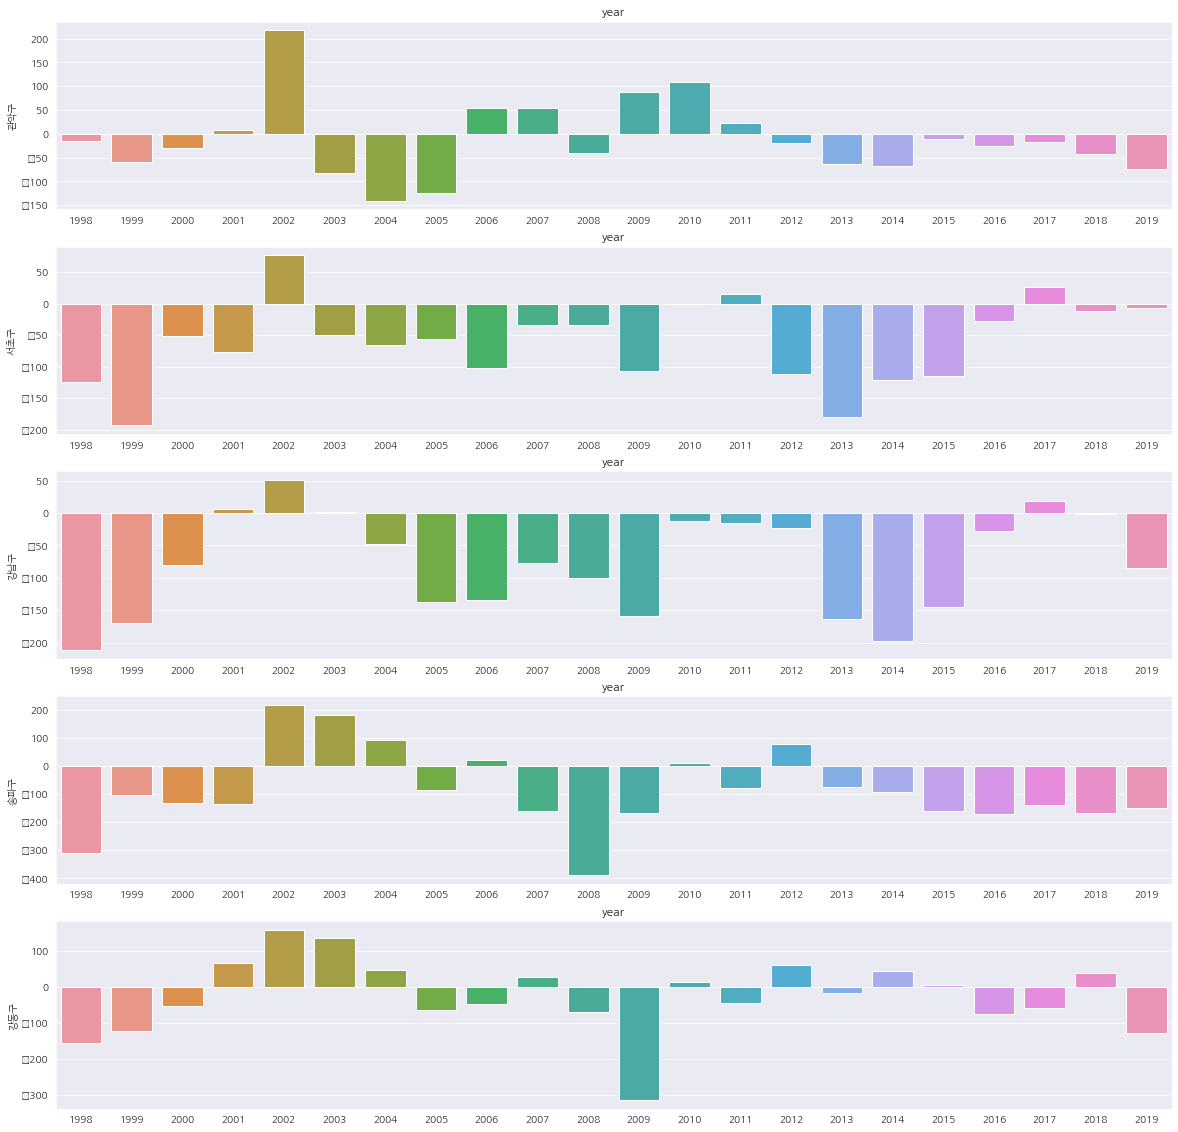

In [42]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1),(ax2),(ax3),(ax4),(ax5)) =plt.subplots(nrows=5,ncols=1)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=gangbuk, x=gangbuk.index, y="관악구(편차)", ax=ax1)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="서초구(편차)", ax=ax2)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="강남구(편차)", ax=ax3)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="송파구(편차)", ax=ax4)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="강동구(편차)", ax=ax5)
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_style("darkgrid")
ax1.set(ylabel='관악구', title ="year")
ax2.set(ylabel='서초구', title ="year")
ax3.set(ylabel='강남구', title ="year")
ax4.set(ylabel='송파구', title ="year")
ax5.set(ylabel='강동구', title ="year")

관악구, 서초구, 강남구, 송파구, 강동구도 전출이 더 많은 것을 볼 수 있었습니다.

다른 구에서 강북구로 전입 혹은 강북구에서 다른 구로 전출의 편차를 그래프로 이제까지 살펴봤는데, 유독 2002년에 강북구로 전입이 많이 온 것을 살펴볼 수 있었습니다. 2002년에 강북구에는 도대체 어떤 일이 있었길래, 서울 각 구에서 강북구로 전입을 한 것일까요? 
우선, 연도별로 총 전입건과 전출건을 비교하여 살펴보도록 하겠습니다.

년도별로 총 전입과 총 전출 비교하여 보기
--

In [43]:
gangbuk

"(구분, 전출지 행정구역)",_종로구(서울),_중구(서울),_용산구(서울),_성동구(서울),_광진구(서울),_동대문구(서울),_중랑구(서울),_성북구(서울),_강북구(서울),_도봉구(서울),_노원구(서울),_은평구(서울),_서대문구(서울),_마포구(서울),_양천구(서울),_강서구(서울),_구로구(서울),_금천구(서울),_영등포구(서울),_동작구(서울),_관악구(서울),_서초구(서울),_강남구(서울),_송파구(서울),_강동구(서울),종로구(전출),중구(전출),용산구(전출),성동구(전출),광진구(전출),동대문구(전출),중랑구(전출),성북구(전출),강북구(전출),도봉구(전출),노원구(전출),은평구(전출),서대문구(전출),마포구(전출),양천구(전출),강서구(전출),구로구(전출),금천구(전출),영등포구(전출),동작구(전출),관악구(전출),서초구(전출),강남구(전출),송파구(전출),강동구(전출),종로구(편차),중구(편차),용산구(편차),성동구(편차),광진구(편차),동대문구(편차),중랑구(편차),성북구(편차),강북구(편차),도봉구(편차),노원구(편차),은평구(편차),서대문구(편차),마포구(편차),양천구(편차),강서구(편차),구로구(편차),금천구(편차),영등포구(편차),동작구(편차),관악구(편차),서초구(편차),강남구(편차),송파구(편차),강동구(편차)
1998,787,401,463,685,664,1187,989,5362,16282,5814,2883,605,496,522,300,349,313,189,332,484,468,374,531,541,403,-551,-327,-426,-700,-727,-896,-916,-5233,-16282,-6443,-5049,-646,-761,-557,-449,-441,-374,-240,-443,-496,-482,-498,-743,-851,-559,236,74,37,-15,-63,291,73,129,0,-629,-2166,-41,-265,-35,-149,-92,-61,-51,-111,-12,-14,-124,-212,-310,-156
1999,833,430,472,748,742,1344,1242,7525,23020,7328,3312,658,554,587,340,464,316,228,376,475,574,422,652,725,506,-835,-573,-508,-1089,-857,-1113,-1303,-6809,-23020,-9092,-6506,-805,-647,-713,-509,-636,-483,-257,-513,-680,-633,-615,-822,-829,-628,-2,-143,-36,-341,-115,231,-61,716,0,-1764,-3194,-147,-93,-126,-169,-172,-167,-29,-137,-205,-59,-193,-170,-104,-122
2000,807,398,441,800,613,1249,1014,8852,21738,7602,3419,605,505,504,341,378,290,199,457,452,532,376,639,660,518,-705,-641,-531,-757,-722,-1435,-1129,-5044,-21738,-7747,-4896,-767,-568,-606,-377,-497,-368,-218,-430,-460,-561,-427,-719,-790,-570,102,-243,-90,43,-109,-186,-115,3808,0,-145,-1477,-162,-63,-102,-36,-119,-78,-19,27,-8,-29,-51,-80,-130,-52
2001,992,546,485,952,734,1562,1036,8094,24005,7752,3772,636,606,522,318,413,360,155,347,519,597,375,611,622,578,-690,-437,-441,-806,-593,-1395,-946,-5303,-24005,-9046,-4917,-768,-623,-515,-392,-525,-368,-190,-419,-464,-589,-452,-605,-755,-511,302,109,44,146,141,167,90,2791,0,-1294,-1145,-132,-17,7,-74,-112,-8,-35,-72,55,8,-77,6,-133,67
2002,1169,702,639,1255,900,1836,1423,10414,28627,8946,5335,812,881,735,454,566,436,204,542,735,758,590,758,892,686,-621,-452,-353,-795,-641,-1279,-1062,-5979,-28627,-8800,-4430,-695,-491,-548,-421,-584,-403,-177,-412,-489,-540,-513,-707,-673,-527,548,250,286,460,259,557,361,4435,0,146,905,117,390,187,33,-18,33,27,130,246,218,77,51,219,159
2003,941,524,469,1047,751,1567,1123,7555,23967,6488,4206,790,746,615,350,482,382,202,407,425,588,424,669,803,566,-744,-383,-401,-704,-615,-1239,-917,-6949,-23967,-8372,-3706,-769,-566,-602,-373,-529,-375,-181,-390,-577,-671,-473,-667,-619,-430,197,141,68,343,136,328,206,606,0,-1884,500,21,180,13,-23,-47,7,21,17,-152,-83,-49,2,184,136
2004,772,534,450,978,666,1434,986,6559,21312,5716,3258,629,547,572,340,432,320,157,371,466,479,355,617,684,506,-620,-344,-383,-589,-602,-1017,-872,-4854,-21312,-7368,-3595,-704,-518,-603,-363,-501,-365,-178,-365,-470,-619,-420,-665,-591,-459,152,190,67,389,64,417,114,1705,0,-1652,-337,-75,29,-31,-23,-69,-45,-21,6,-4,-140,-65,-48,93,47
2005,721,440,459,700,575,1193,867,5855,20131,5422,3079,676,501,511,299,385,304,130,327,494,471,345,548,587,409,-595,-357,-439,-651,-516,-1270,-832,-6956,-20131,-7496,-3658,-701,-474,-631,-395,-571,-387,-173,-415,-490,-596,-401,-685,-671,-472,126,83,20,49,59,-77,35,-1101,0,-2074,-579,-25,27,-120,-96,-186,-83,-43,-88,4,-125,-56,-137,-84,-63
2006,692,438,520,842,724,1237,987,6488,23939,6227,3539,705,618,580,384,579,335,157,360,509,667,430,604,642,462,-679,-418,-361,-695,-711,-1074,-943,-7335,-23939,-7735,-3865,-643,-564,-621,-412,-597,-395,-196,-427,-432,-613,-532,-738,-619,-509,13,20,159,147,13,163,44,-847,0,-1508,-326,62,54,-41,-28,-18,-60,-39,-67,77,54,-102,-134,23,-47
2007,799,468,462,739,607,1208,935,8343,25215,6117,3074,720,530,572,288,424,312,168,391,421,606,416,546,552,500,-646,-348,-481,-654,-625,-1180,-916,-6174,-25215,-8354,-4020,-660,-509,-515,-415,-635,-310,-185,-395,-436,-552,-450,-623,-710,-471,153,120,-19,85,-18,28,1

In [44]:
gangbuk['총전입']=0
i=0

for i in range(0,22):
    a=gangbuk.iloc[i, :25].values.sum()
    gangbuk['총전입'][i]=a
    i+=1

In [45]:
gangbuk['총전출']=0
i=0

for i in range(0,22):
    a=gangbuk.iloc[i, 26:50].values.sum()
    gangbuk['총전출'][i]=a
    i+=1

In [46]:
gangbuk['총편차']=0
i=0

for i in range(0,22):
    a=(gangbuk.iloc[:, 75].values)+(gangbuk.iloc[:, 76].values)
    gangbuk['총편차']=a
    i+=1

In [47]:
gangbuk.head()

"(구분, 전출지 행정구역)",_종로구(서울),_중구(서울),_용산구(서울),_성동구(서울),_광진구(서울),_동대문구(서울),_중랑구(서울),_성북구(서울),_강북구(서울),_도봉구(서울),_노원구(서울),_은평구(서울),_서대문구(서울),_마포구(서울),_양천구(서울),_강서구(서울),_구로구(서울),_금천구(서울),_영등포구(서울),_동작구(서울),_관악구(서울),_서초구(서울),_강남구(서울),_송파구(서울),_강동구(서울),종로구(전출),중구(전출),용산구(전출),성동구(전출),광진구(전출),동대문구(전출),중랑구(전출),성북구(전출),강북구(전출),도봉구(전출),노원구(전출),은평구(전출),서대문구(전출),마포구(전출),양천구(전출),강서구(전출),구로구(전출),금천구(전출),영등포구(전출),동작구(전출),관악구(전출),서초구(전출),강남구(전출),송파구(전출),강동구(전출),종로구(편차),중구(편차),용산구(편차),성동구(편차),광진구(편차),동대문구(편차),중랑구(편차),성북구(편차),강북구(편차),도봉구(편차),노원구(편차),은평구(편차),서대문구(편차),마포구(편차),양천구(편차),강서구(편차),구로구(편차),금천구(편차),영등포구(편차),동작구(편차),관악구(편차),서초구(편차),강남구(편차),송파구(편차),강동구(편차),총전입,총전출,총편차
1998,787,401,463,685,664,1187,989,5362,16282,5814,2883,605,496,522,300,349,313,189,332,484,468,374,531,541,403,-551,-327,-426,-700,-727,-896,-916,-5233,-16282,-6443,-5049,-646,-761,-557,-449,-441,-374,-240,-443,-496,-482,-498,-743,-851,-559,236,74,37,-15,-63,291,73,129,0,-629,-2166,-41,-265,-35,-149,-92,-61,-51,-111,-12,-14,-124,-212,-310,-156,41424,-44539,-3115
1999,833,430,472,748,742,1344,1242,7525,23020,7328,3312,658,554,587,340,464,316,228,376,475,574,422,652,725,506,-835,-573,-508,-1089,-857,-1113,-1303,-6809,-23020,-9092,-6506,-805,-647,-713,-509,-636,-483,-257,-513,-680,-633,-615,-822,-829,-628,-2,-143,-36,-341,-115,231,-61,716,0,-1764,-3194,-147,-93,-126,-169,-172,-167,-29,-137,-205,-59,-193,-170,-104,-122,53873,-59640,-5767
2000,807,398,441,800,613,1249,1014,8852,21738,7602,3419,605,505,504,341,378,290,199,457,452,532,376,639,660,518,-705,-641,-531,-757,-722,-1435,-1129,-5044,-21738,-7747,-4896,-767,-568,-606,-377,-497,-368,-218,-430,-460,-561,-427,-719,-790,-570,102,-243,-90,43,-109,-186,-115,3808,0,-145,-1477,-162,-63,-102,-36,-119,-78,-19,27,-8,-29,-51,-80,-130,-52,53389,-51998,1391
2001,992,546,485,952,734,1562,1036,8094,24005,7752,3772,636,606,522,318,413,360,155,347,519,597,375,611,622,578,-690,-437,-441,-806,-593,-1395,-946,-5303,-24005,-9046,-4917,-768,-623,-515,-392,-525,-368,-190,-419,-464,-589,-452,-605,-755,-511,302,109,44,146,141,167,90,2791,0,-1294,-1145,-132,-17,7,-74,-112,-8,-35,-72,55,8,-77,6,-133,67,56589,-55065,1524
2002,1169,702,639,1255,900,1836,1423,10414,28627,8946,5335,812,881,735,454,566,436,204,542,735,758,590,758,892,686,-621,-452,-353,-795,-641,-1279,-1062,-5979,-28627,-8800,-4430,-695,-491,-548,-421,-584,-403,-177,-412,-489,-540,-513,-707,-673,-527,548,250,286,460,259,557,361,4435,0,146,905,117,390,187,33,-18,33,27,130,246,218,77,51,219,159,70295,-59598,10697


[Text(0, 0.5, '총편차'), Text(0.5, 1.0, 'year')]

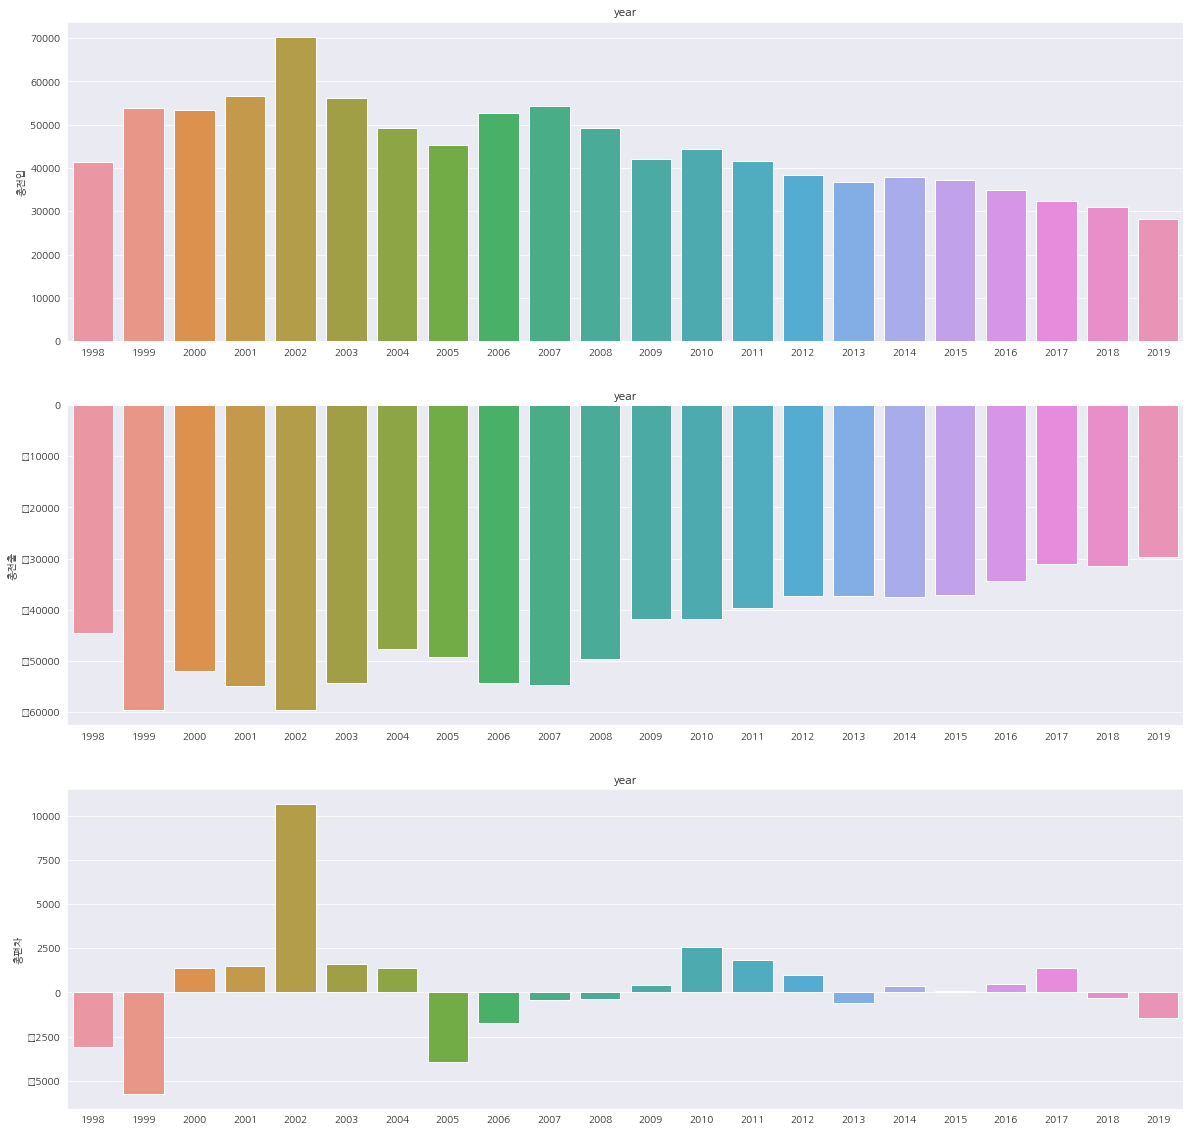

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1),(ax2),(ax3)) =plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(20,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=gangbuk, x=gangbuk.index, y='총전입', ax=ax1)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y="총전출", ax=ax2)
"\n"
sns.barplot(data=gangbuk, x=gangbuk.index, y='총편차', ax=ax3)
plt.rcParams['font.family'] = 'NanumGothic'

sns.set_style("darkgrid")
ax1.set(ylabel='총전입', title ="year")
ax2.set(ylabel='총전출', title ="year")
ax3.set(ylabel='총편차', title ="year")

1999년에는 유난히 전출이 많았고, 2002년에는 유난히 전입이 많았습니다. 이외에도 1998년, 2005년에는 전출이 많은 것을 확인 할 수 있으며, 2010년에도 전입이 많은 것을 확인 할 수 있습니다. 마지막으로 2015년에는 전입과 전출량이 거의 유사한 것을 알 수 있습니다.

년도별로 분석해보기 & 구별로 총 이동 통계 확인
--

후보1: 2002년

후보2: 1999년


2002년

In [49]:
ArianaGrande=pd.DataFrame(gangbuk.iloc[4, :])

In [50]:
ArianaGrande

,2002
"(구분, 전출지 행정구역)",
_종로구(서울),1169
_중구(서울),702
_용산구(서울),639
_성동구(서울),1255
_광진구(서울),900
...,...
송파구(편차),219
강동구(편차),159
총전입,70295


2002년 전입

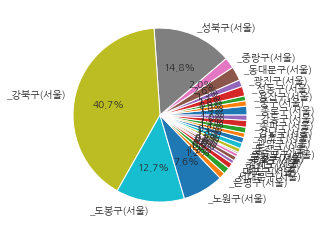

In [51]:
ratio=ArianaGrande.iloc[:25].values
labels=ArianaGrande.iloc[:25].index

plt.rcParams['font.family'] = 'NanumGothic'
plt.pie(ratio, labels=labels, autopct="%.1f%%")
plt.show()

전입량으로만 봤을 때는, 강북구에서 전입량이 가장 많았고, 그 다음 성북구와 도봉구가 많았던 것을 확인 할 수 있었습니다.

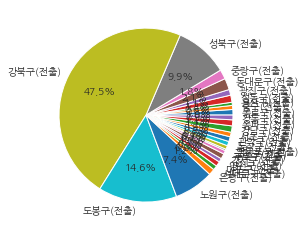

In [52]:
ratio=-1*(ArianaGrande.iloc[25:50].values)
labels=ArianaGrande.iloc[25:50].index

plt.rcParams['font.family'] = 'NanumGothic'
plt.pie(ratio, labels=labels, autopct="%.1f%%")
plt.show()

전출량으로만 봤을 때에도 강북구에서 강북구로 전출량이 가장 많았고, 도봉구, 성북구 순으로 전출량이 많았던 것을 확인 할 수 있습니다.

1999년

In [53]:
threenine=pd.DataFrame(gangbuk.iloc[1, :])

In [54]:
threenine

,1999
"(구분, 전출지 행정구역)",
_종로구(서울),833
_중구(서울),430
_용산구(서울),472
_성동구(서울),748
_광진구(서울),742
...,...
송파구(편차),-104
강동구(편차),-122
총전입,53873


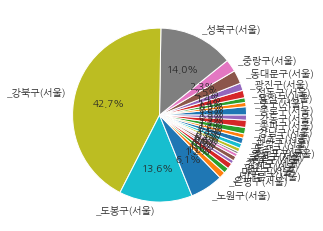

In [55]:
ratio=threenine.iloc[:25].values
labels=threenine.iloc[:25].index

plt.rcParams['font.family'] = 'NanumGothic'
plt.pie(ratio, labels=labels, autopct="%.1f%%")
plt.show()

2002년에 비하면 강북구에서 강북구로 전입오는 사람 비율이 2.7% 커졌으나 여전히 강북구가 가장 많습니다. 그 다음 비율도 성북구, 도봉구로 동일합니다.

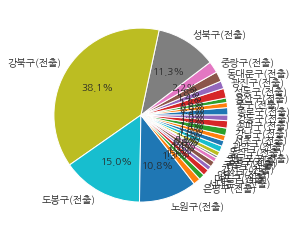

In [56]:
ratio=-1*(threenine.iloc[25:50].values)
labels=threenine.iloc[25:50].index

plt.rcParams['font.family'] = 'NanumGothic'
plt.pie(ratio, labels=labels, autopct="%.1f%%")
plt.show()

전출 역시 강북구(전출)로 전출간 비율이 가장 높습니다.
그 다음 역시 도봉구와 성북구로 비율이 가장 높습니다.

In [57]:
gangbuk_t=gangbuk.transpose()
gangbuk_t

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
"(구분, 전출지 행정구역)",,,,,,,,,,,,,,,,,,,,,,
_종로구(서울),787,833,807,992,1169,941,772,721,692,799,724,695,731,584,698,608,592,545,571,572,488,485
_중구(서울),401,430,398,546,702,524,534,440,438,468,516,404,544,392,396,356,310,353,350,349,294,286
_용산구(서울),463,472,441,485,639,469,450,459,520,462,376,401,474,429,338,366,353,332,355,278,308,331
_성동구(서울),685,748,800,952,1255,1047,978,700,842,739,1062,682,620,771,702,572,516,483,443,424,380,452
_광진구(서울),664,742,613,734,900,751,666,575,724,607,558,503,605,520,481,448,434,444,387,433,354,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
송파구(편차),-310,-104,-130,-133,219,184,93,-84,23,-158,-389,-166,11,-76,80,-74,-92,-158,-169,-138,-166,-147
강동구(편차),-156,-122,-52,67,159,136,47,-63,-47,29,-70,-316,14,-45,60,-18,43,5,-75,-60,39,-129
총전입,41424,53873,53389,56589,70295,56087,49140,45429,52665,54413,49273,42162,44453,41597,38322,36785,37903,37175,34831,32401,31092,28180


In [58]:
i=0
gangbuk_t['구별합계']=0

for i in range(0,78):
    a=gangbuk_t.iloc[i, :].values.sum()
    gangbuk_t['구별합계'][i]=a
    i+=1

In [59]:
gangbuk_t

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,구별합계
"(구분, 전출지 행정구역)",,,,,,,,,,,,,,,,,,,,,,,
_종로구(서울),787,833,807,992,1169,941,772,721,692,799,724,695,731,584,698,608,592,545,571,572,488,485,15806
_중구(서울),401,430,398,546,702,524,534,440,438,468,516,404,544,392,396,356,310,353,350,349,294,286,9431
_용산구(서울),463,472,441,485,639,469,450,459,520,462,376,401,474,429,338,366,353,332,355,278,308,331,9201
_성동구(서울),685,748,800,952,1255,1047,978,700,842,739,1062,682,620,771,702,572,516,483,443,424,380,452,15853
_광진구(서울),664,742,613,734,900,751,666,575,724,607,558,503,605,520,481,448,434,444,387,433,354,428,12571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
송파구(편차),-310,-104,-130,-133,219,184,93,-84,23,-158,-389,-166,11,-76,80,-74,-92,-158,-169,-138,-166,-147,-1884
강동구(편차),-156,-122,-52,67,159,136,47,-63,-47,29,-70,-316,14,-45,60,-18,43,5,-75,-60,39,-129,-554
총전입,41424,53873,53389,56589,70295,56087,49140,45429,52665,54413,49273,42162,44453,41597,38322,36785,37903,37175,34831,32401,31092,28180,987478


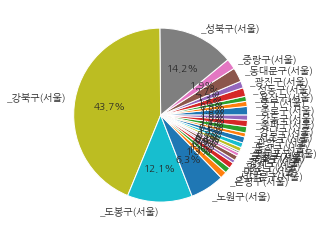

In [60]:
ratio=gangbuk_t.iloc[:25, 22].values
labels=gangbuk_t.iloc[:25, 22].index

plt.rcParams['font.family'] = 'NanumGothic'
plt.pie(ratio, labels=labels, autopct="%.1f%%")
plt.show()

전체 년도로 바라봐도 강북구에서 강북구로 전입온 사람이 가장 많았으며, 성북구와 도봉구가 그 다음인 것을 보실 수 있습니다.


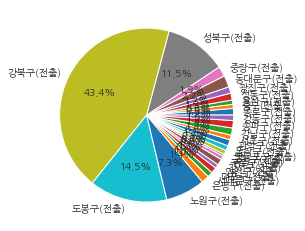

In [61]:
ratio=-1*(gangbuk_t.iloc[25:50, 22].values)
labels=gangbuk_t.iloc[25:50, 22].index

plt.rcParams['font.family'] = 'NanumGothic'
plt.pie(ratio, labels=labels, autopct="%.1f%%")
plt.show()

전체 년도로 바라봤을 때 역시, 강북구에서 강북구로 가장 많이 전출을 갔으며, 도봉구와 성북구가 그 다음인 것을 보실 수 있습니다.

이를 통해 전입을 올 경우는 성북구, 도봉구 순으로 전입을 많이오며,
전출을 갈 경우에는 도봉구, 성북구 순으로 전출을 많이 가는 것을 알 수 있습니다.

In [ ]:
!pip install folium

In [63]:
seoul_map=pd.DataFrame({'loc':['종로구청','중구청','용산구청','성동구청','광진구청','동대문구청','중랑구청','성북구청',
                         '강북구청','도봉구청','노원구청','은평구청','서대문구청','마포구청','양천구청',
                         '강서구청','구로구청','금천구청','영등포구청','동작구청','관악구청','서초구청',
                         '강남구청','송파구청','강동구청'],
    'longitude':[37.572871414289644, 37.56395398268869, 37.53264449118431, 37.563529451827144,
                 37.53871193422255, 37.57467057739606, 37.606704472785324, 37.58954451235014,
                37.63980555620519, 37.66901126889522, 37.65409734882221, 37.60276372927224,
                 37.57925780699572, 37.566245203625925, 37.51707842707858, 37.551675945747235,
                 37.495483092329195, 37.45694552996452, 37.52643316308396, 37.51261700707126,
                 37.47834133577336, 37.48369317054018, 37.517327780214, 37.514443329480805, 
                 37.53010545949103],
    'latitude':[126.97911342506208,126.99748732506174,126.9900858134194,127.03708728992092,
                127.08237719807612, 127.03983197267482,127.09255962506256,127.0167859134206,
                127.0255259396945, 127.04711391342215, 127.05632816540158, 126.92923438517099,
                126.93684587109205, 126.90164048235405, 126.86655939431371, 126.84948972131482,
                126.88763501331556, 126.89534685389552,126.89618914497741, 126.93985334225478,
                126.95153458458238, 127.03263954040347, 127.0473157908982, 127.10603767177614,
                127.12376392572678 ]})

seoul_map

,loc,longitude,latitude
0,종로구청,37.572871,126.979113
1,중구청,37.563954,126.997487
2,용산구청,37.532644,126.990086
3,성동구청,37.563529,127.037087
4,광진구청,37.538712,127.082377
5,동대문구청,37.574671,127.039832
6,중랑구청,37.606704,127.092560
7,성북구청,37.589545,127.016786
8,강북구청,37.639806,127.025526
9,도봉구청,37.669011,127.047114


In [64]:
seoul_map['latitude'].mean()

126.98913529213172

In [65]:
import folium
import numpy as np

zoom_start=11

f_map=folium.Map(location=[37.553518239653386,126.98913529213172], tiles='OpenStreetMap', zoom_start=zoom_start)

for i in range(0,25):
    folium.Marker(location=[seoul_map['longitude'][i],seoul_map['latitude'][i]], icon=folium.Icon(color='blue')).add_to(f_map)
    i+=1

f_map

In [66]:
import folium
import numpy as np

zoom_start=11

f_map=folium.Map(location=[37.639806,127.025526], tiles='OpenStreetMap', zoom_start=zoom_start)


folium.Marker(location=[seoul_map['longitude'][8],seoul_map['latitude'][8]], icon=folium.Icon(color='blue')).add_to(f_map)
folium.Marker(location=[seoul_map['longitude'][7],seoul_map['latitude'][7]], icon=folium.Icon(color='green')).add_to(f_map)
folium.Marker(location=[seoul_map['longitude'][9],seoul_map['latitude'][9]], icon=folium.Icon(color='red')).add_to(f_map)

f_map

빨간색 지점: 도봉구, 파란색 지점: 강북구, 초록색 지점: 성북구

전입 혹은 전출시 인근 지역에서 전입을 오거나 전출을 오는 것을 확인 할 수 있다.

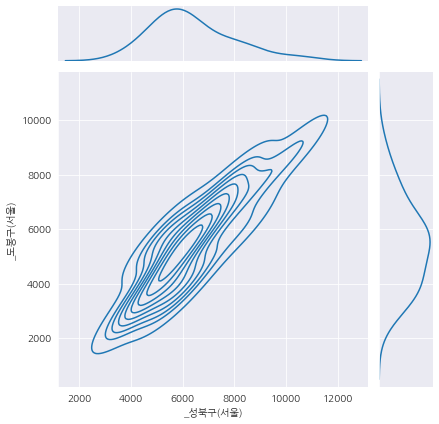

In [67]:
sns.jointplot(x="_성북구(서울)", y="_도봉구(서울)", data=gangbuk, kind = 'kde')

성북구에서 전입이 많이 올 때, 도봉구 역시 전입이 많이 오는 것을 확인 할 수 있다. 이 때, 4000건 정도에서 가장 빈도가 높은 것을 확인 할 수 있다.

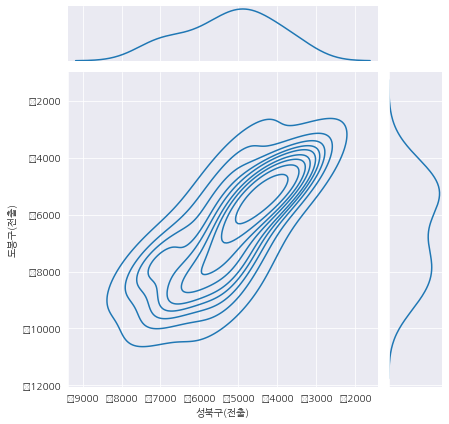

In [68]:
sns.jointplot(x='성북구(전출)',y='도봉구(전출)', data=gangbuk, kind='kde')

성북구가 전출을 많이 갈 때, 도봉구도 전출을 많이 가는 것을 확인 할 수 있다. 이 때, 5000건 정도에서 빈도가 높은 것을 확인할 수 있다.

구별 전입 상관관계

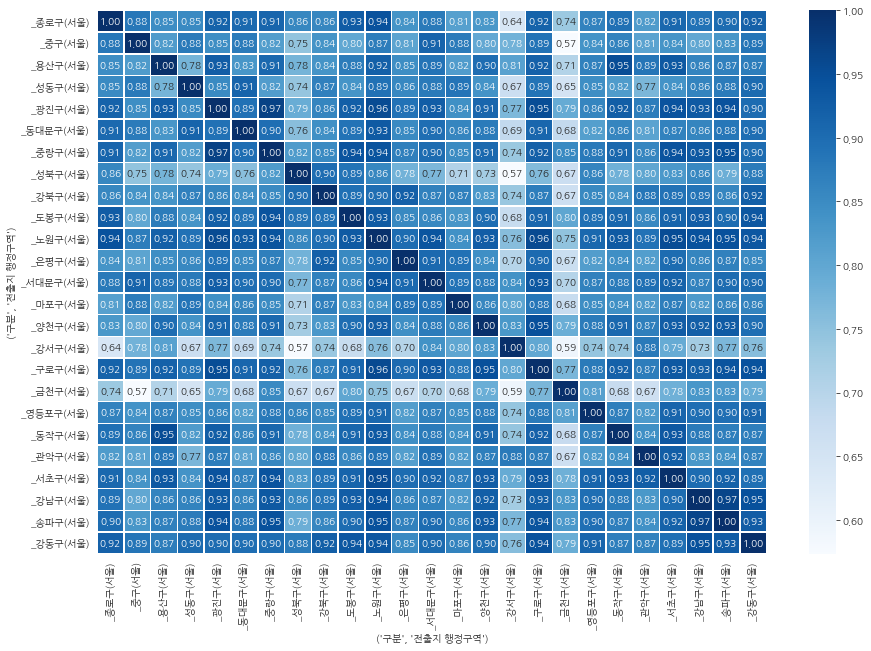

In [69]:
gangbuk_1=gangbuk.iloc[:, :25]
plt.figure(figsize=(15,10))
sns.heatmap(data=gangbuk_1.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

구별 전출 상관관계

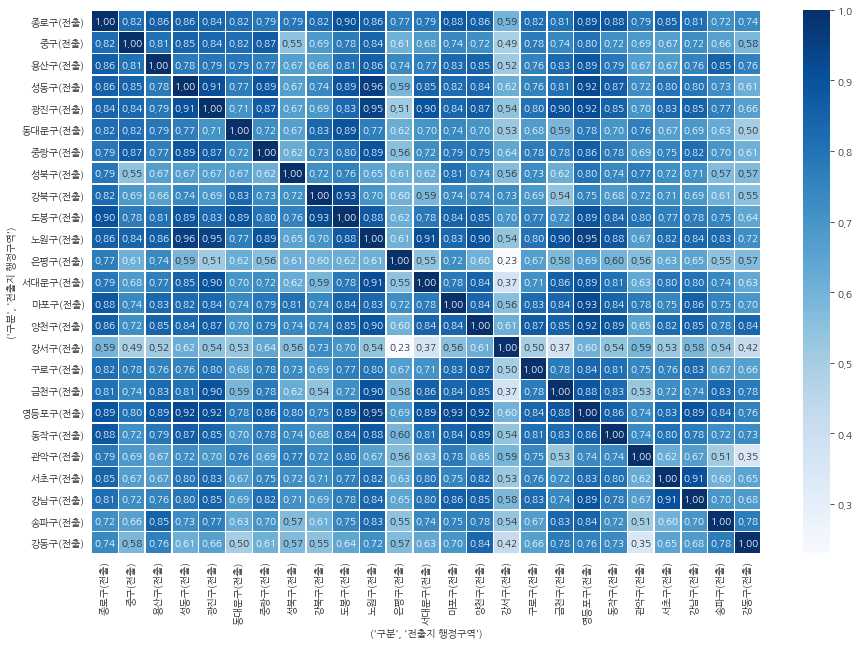

In [70]:
gangbuk_2=gangbuk.iloc[:, 25:50]
plt.figure(figsize=(15,10))
sns.heatmap(data=gangbuk_2.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

부동산 실거래가 데이터 확인하기
--

다세대 연립, 단독 다가구, 아파트, 오피스텔의 구별 평균 매매가로 측정

강북구 실거래가 데이터 불러오기
--

2019년 강북구 실거래가 데이터 불러오기

In [71]:
#df19_1= pd.read_csv("단독다가구(매매)_실거래가_20210615184701.csv", encoding='CP949', skiprows=15, thousands=',')
#df19_2= pd.read_csv("아파트(매매)__실거래가_20210615184556.csv", encoding='CP949', skiprows=15, thousands=',')
#df19_3= pd.read_csv("연립다세대(매매)__실거래가_20210615184638.csv", encoding='CP949', skiprows=15, thousands=',')
#df19_4= pd.read_csv("오피스텔(매매)__실거래가_20210615184721.csv", encoding='CP949', skiprows=15, thousands=',')

2018년 강북구 실거래가 데이터 불러오기

In [72]:
#df18_1= pd.read_csv("단독다가구(매매)_실거래가_20210615190906.csv", encoding='CP949', skiprows=15, thousands=',')
#df18_2= pd.read_csv("아파트(매매)__실거래가_20210615190739.csv", encoding='CP949', skiprows=15, thousands=',')
#df18_3= pd.read_csv("연립다세대(매매)__실거래가_20210615190836.csv", encoding='CP949', skiprows=15, thousands=',')
#df18_4= pd.read_csv("오피스텔(매매)__실거래가_20210615191002.csv", encoding='CP949', skiprows=15, thousands=',')

2017년 강북구 실거래가 데이터 불러오기

In [73]:
#df17_1= pd.read_csv("단독다가구(매매)_실거래가_20210615191342.csv", encoding='CP949', skiprows=15, thousands=',')
#df17_2= pd.read_csv("아파트(매매)__실거래가_20210615191234.csv", encoding='CP949', skiprows=15, thousands=',')
#df17_3= pd.read_csv("연립다세대(매매)__실거래가_20210615191318.csv", encoding='CP949', skiprows=15, thousands=',')
#df17_4= pd.read_csv("오피스텔(매매)__실거래가_20210615191403.csv", encoding='CP949', skiprows=15, thousands=',')

2016년 강북구 실거래가 데이터 불러오기

In [74]:
#df16_1= pd.read_csv("단독다가구(매매)_실거래가_20210615191705.csv", encoding='CP949', skiprows=15, thousands=',')
#df16_2= pd.read_csv("아파트(매매)__실거래가_20210615191611.csv", encoding='CP949', skiprows=15, thousands=',')
#df16_3= pd.read_csv("연립다세대(매매)__실거래가_20210615191643.csv", encoding='CP949', skiprows=15, thousands=',')
#df16_4= pd.read_csv("오피스텔(매매)__실거래가_20210615191729.csv", encoding='CP949', skiprows=15, thousands=',')

2015년 강북구 실거래가 데이터 불러오기

In [75]:
#df15_1= pd.read_csv("단독다가구(매매)_실거래가_20210615192031.csv", encoding='CP949', skiprows=15, thousands=',')
#df15_2= pd.read_csv("아파트(매매)__실거래가_20210615191935.csv", encoding='CP949', skiprows=15, thousands=',')
#df15_3= pd.read_csv("연립다세대(매매)__실거래가_20210615192004.csv", encoding='CP949', skiprows=15, thousands=',')
#df15_4= pd.read_csv("오피스텔(매매)__실거래가_20210615192054.csv", encoding='CP949', skiprows=15, thousands=',')

2014년 강북구 실거래가 데이터 불러오기

In [76]:
#df14_1= pd.read_csv("단독다가구(매매)_실거래가_20210615192411.csv", encoding='CP949', skiprows=15, thousands=',')
#df14_2= pd.read_csv("아파트(매매)__실거래가_20210615192325.csv", encoding='CP949', skiprows=15, thousands=',')
#df14_3= pd.read_csv("연립다세대(매매)__실거래가_20210615192351.csv", encoding='CP949', skiprows=15, thousands=',')
#df14_4= pd.read_csv("오피스텔(매매)__실거래가_20210615192433.csv", encoding='CP949', skiprows=15, thousands=',')

2013년 강북구 실거래가 데이터 불러오기

In [77]:
#df13_1= pd.read_csv("단독다가구(매매)_실거래가_20210615192703.csv", encoding='CP949', skiprows=15, thousands=',')
#df13_2= pd.read_csv("아파트(매매)__실거래가_20210615192622.csv", encoding='CP949', skiprows=15, thousands=',')
#df13_3= pd.read_csv("연립다세대(매매)__실거래가_20210615192643.csv", encoding='CP949', skiprows=15, thousands=',')
#df13_4= pd.read_csv("오피스텔(매매)__실거래가_20210615192723.csv", encoding='CP949', skiprows=15, thousands=',')

2012년 강북구 실거래가 데이터 불러오기

In [78]:
#df12_1= pd.read_csv("단독다가구(매매)_실거래가_20210615193034.csv", encoding='CP949', skiprows=15, thousands=',')
#df12_2= pd.read_csv("아파트(매매)__실거래가_20210615192933.csv", encoding='CP949', skiprows=15, thousands=',')
#df12_3= pd.read_csv("연립다세대(매매)__실거래가_20210615193012.csv", encoding='CP949', skiprows=15, thousands=',')
#df12_4= pd.read_csv("오피스텔(매매)__실거래가_20210615193052.csv", encoding='CP949', skiprows=15, thousands=',')

2011년 강북구 실거래가 데이터 불러오기

In [79]:
#df11_1= pd.read_csv("단독다가구(매매)_실거래가_20210615193329.csv", encoding='CP949', skiprows=15, thousands=',')
#df11_2= pd.read_csv("아파트(매매)__실거래가_20210615193246.csv", encoding='CP949', skiprows=15, thousands=',')
#df11_3= pd.read_csv("연립다세대(매매)__실거래가_20210615193307.csv", encoding='CP949', skiprows=15, thousands=',')
#df11_4= pd.read_csv("오피스텔(매매)__실거래가_20210615193348.csv", encoding='CP949', skiprows=15, thousands=',')

2010년 강북구 실거래가 데이터 불러오기

In [80]:
#df10_1= pd.read_csv("단독다가구(매매)_실거래가_20210615193608.csv", encoding='CP949', skiprows=15, thousands=',')
#df10_2= pd.read_csv("아파트(매매)__실거래가_20210615193528.csv", encoding='CP949', skiprows=15, thousands=',')
#df10_3= pd.read_csv("연립다세대(매매)__실거래가_20210615193551.csv", encoding='CP949', skiprows=15, thousands=',')
#df10_4= pd.read_csv("오피스텔(매매)__실거래가_20210615193625.csv", encoding='CP949', skiprows=15, thousands=',')

2009년 강북구 실거래가 데이터 불러오기

In [81]:
#df9_1= pd.read_csv("단독다가구(매매)_실거래가_20210615194013.csv", encoding='CP949', skiprows=15, thousands=',')
#df9_2= pd.read_csv("아파트(매매)__실거래가_20210615193828.csv", encoding='CP949', skiprows=15, thousands=',')
#df9_3= pd.read_csv("연립다세대(매매)__실거래가_20210615193950.csv", encoding='CP949', skiprows=15, thousands=',')
#df9_4= pd.read_csv("오피스텔(매매)__실거래가_20210615194044.csv", encoding='CP949', skiprows=15, thousands=',')

2008년 강북구 실거래가 데이터 불러오기

In [82]:
#df8_1= pd.read_csv("단독다가구(매매)_실거래가_20210615194402.csv", encoding='CP949', skiprows=15, thousands=',')
#df8_2= pd.read_csv("아파트(매매)__실거래가_20210615194319.csv", encoding='CP949', skiprows=15, thousands=',')
#df8_3= pd.read_csv("연립다세대(매매)__실거래가_20210615194344.csv", encoding='CP949', skiprows=15, thousands=',')
#df8_4= pd.read_csv("오피스텔(매매)__실거래가_20210615194419.csv", encoding='CP949', skiprows=15, thousands=',')

2007년 강북구 실거래가 데이터 불러오기

In [83]:
#df7_1= pd.read_csv("단독다가구(매매)_실거래가_20210615195349.csv", encoding='CP949', skiprows=15, thousands=',')
#df7_2= pd.read_csv("아파트(매매)__실거래가_20210615195246.csv", encoding='CP949', skiprows=15, thousands=',')
#df7_3= pd.read_csv("연립다세대(매매)__실거래가_20210615195319.csv", encoding='CP949', skiprows=15, thousands=',')
#df7_4= pd.read_csv("오피스텔(매매)__실거래가_20210615195410.csv", encoding='CP949', skiprows=15, thousands=',')

2006년 강북구 실거래가 데이터 불러오기

In [84]:
#df6_1= pd.read_csv("단독다가구(매매)_실거래가_20210615195703.csv", encoding='CP949', skiprows=15, thousands=',')
#df6_2= pd.read_csv("아파트(매매)__실거래가_20210615195618.csv", encoding='CP949', skiprows=15, thousands=',')
#df6_3= pd.read_csv("연립다세대(매매)__실거래가_20210615195642.csv", encoding='CP949', skiprows=15, thousands=',')
#df6_4= pd.read_csv("오피스텔(매매)__실거래가_20210615195727.csv", encoding='CP949', skiprows=15, thousands=',')

정리한 price csv로 한 번에 올리기

In [ ]:
from google.colab import files
uploaded=files.upload()

In [88]:
price=pd.read_csv('price.csv')

2006년~2019년 데이터로 실거래가 데이터 만들기
--

1) 단독다가구(매매)_실거래가

2) 아파트(매매)_실거래가

3) 연립다세대(매매)_실거래가

4) 오피스텔(매매)_실거래가

단위: 만 원

2006년 이전 실거래가 자료는 없으므로 gangbuk 데이터에서 2006년 이전 데이터는 제거해줍니다.


In [89]:
gangbuk=gangbuk.iloc[8:, :]

In [141]:
#gangbuk['단독다가구(매매)_실거래가']=0

In [91]:
#gangbuk.loc['2006', '단독다가구(매매)_실거래가']=df6_1['거래금액(만원)'].mean()
#gangbuk.loc['2007', '단독다가구(매매)_실거래가']=df7_1['거래금액(만원)'].mean()
#gangbuk.loc['2008', '단독다가구(매매)_실거래가']=df8_1['거래금액(만원)'].mean()
#gangbuk.loc['2009', '단독다가구(매매)_실거래가']=df9_1['거래금액(만원)'].mean()
#gangbuk.loc['2010', '단독다가구(매매)_실거래가']=df10_1['거래금액(만원)'].mean()
#gangbuk.loc['2011', '단독다가구(매매)_실거래가']=df11_1['거래금액(만원)'].mean()
#gangbuk.loc['2012', '단독다가구(매매)_실거래가']=df12_1['거래금액(만원)'].mean()
#gangbuk.loc['2013', '단독다가구(매매)_실거래가']=df13_1['거래금액(만원)'].mean()
#gangbuk.loc['2014', '단독다가구(매매)_실거래가']=df14_1['거래금액(만원)'].mean()
#gangbuk.loc['2015', '단독다가구(매매)_실거래가']=df15_1['거래금액(만원)'].mean()
#gangbuk.loc['2016', '단독다가구(매매)_실거래가']=df16_1['거래금액(만원)'].mean()
#gangbuk.loc['2017', '단독다가구(매매)_실거래가']=df17_1['거래금액(만원)'].mean()
#gangbuk.loc['2018', '단독다가구(매매)_실거래가']=df18_1['거래금액(만원)'].mean()
#gangbuk.loc['2019', '단독다가구(매매)_실거래가']=df19_1['거래금액(만원)'].mean()

In [142]:
#gangbuk['아파트(매매)_실거래가']=0

In [93]:
#gangbuk.loc['2006', '아파트(매매)_실거래가']=df6_2['거래금액(만원)'].mean()
#gangbuk.loc['2007', '아파트(매매)_실거래가']=df7_2['거래금액(만원)'].mean()
#gangbuk.loc['2008', '아파트(매매)_실거래가']=df8_2['거래금액(만원)'].mean()
#gangbuk.loc['2009', '아파트(매매)_실거래가']=df9_2['거래금액(만원)'].mean()
#gangbuk.loc['2010', '아파트(매매)_실거래가']=df10_2['거래금액(만원)'].mean()
#gangbuk.loc['2011', '아파트(매매)_실거래가']=df11_2['거래금액(만원)'].mean()
#gangbuk.loc['2012', '아파트(매매)_실거래가']=df12_2['거래금액(만원)'].mean()
#gangbuk.loc['2013', '아파트(매매)_실거래가']=df13_2['거래금액(만원)'].mean()
#gangbuk.loc['2014', '아파트(매매)_실거래가']=df14_2['거래금액(만원)'].mean()
#gangbuk.loc['2015', '아파트(매매)_실거래가']=df15_2['거래금액(만원)'].mean()
#gangbuk.loc['2016', '아파트(매매)_실거래가']=df16_2['거래금액(만원)'].mean()
#gangbuk.loc['2017', '아파트(매매)_실거래가']=df17_2['거래금액(만원)'].mean()
#gangbuk.loc['2018', '아파트(매매)_실거래가']=df18_2['거래금액(만원)'].mean()
#gangbuk.loc['2019', '아파트(매매)_실거래가']=df19_2['거래금액(만원)'].mean()

In [143]:
#gangbuk['연립다세대(매매)_실거래가']=0

In [95]:
#gangbuk.loc['2006', '연립다세대(매매)_실거래가']=df6_3['거래금액(만원)'].mean()
#gangbuk.loc['2007', '연립다세대(매매)_실거래가']=df7_3['거래금액(만원)'].mean()
#gangbuk.loc['2008', '연립다세대(매매)_실거래가']=df8_3['거래금액(만원)'].mean()
#gangbuk.loc['2009', '연립다세대(매매)_실거래가']=df9_3['거래금액(만원)'].mean()
#gangbuk.loc['2010', '연립다세대(매매)_실거래가']=df10_3['거래금액(만원)'].mean()
#gangbuk.loc['2011', '연립다세대(매매)_실거래가']=df11_3['거래금액(만원)'].mean()
#gangbuk.loc['2012', '연립다세대(매매)_실거래가']=df12_3['거래금액(만원)'].mean()
#gangbuk.loc['2013', '연립다세대(매매)_실거래가']=df13_3['거래금액(만원)'].mean()
#gangbuk.loc['2014', '연립다세대(매매)_실거래가']=df14_3['거래금액(만원)'].mean()
#gangbuk.loc['2015', '연립다세대(매매)_실거래가']=df15_3['거래금액(만원)'].mean()
#gangbuk.loc['2016', '연립다세대(매매)_실거래가']=df16_3['거래금액(만원)'].mean()
#gangbuk.loc['2017', '연립다세대(매매)_실거래가']=df17_3['거래금액(만원)'].mean()
#gangbuk.loc['2018', '연립다세대(매매)_실거래가']=df18_3['거래금액(만원)'].mean()
#gangbuk.loc['2019', '연립다세대(매매)_실거래가']=df19_3['거래금액(만원)'].mean()

In [144]:
#gangbuk['오피스텔(매매)_실거래가']=0

In [97]:
#gangbuk.loc['2006', '오피스텔(매매)_실거래가']=df6_4['거래금액(만원)'].mean()
#gangbuk.loc['2007', '오피스텔(매매)_실거래가']=df7_4['거래금액(만원)'].mean()
#gangbuk.loc['2008', '오피스텔(매매)_실거래가']=df8_4['거래금액(만원)'].mean()
#gangbuk.loc['2009', '오피스텔(매매)_실거래가']=df9_4['거래금액(만원)'].mean()
#gangbuk.loc['2010', '오피스텔(매매)_실거래가']=df10_4['거래금액(만원)'].mean()
#gangbuk.loc['2011', '오피스텔(매매)_실거래가']=df11_4['거래금액(만원)'].mean()
#gangbuk.loc['2012', '오피스텔(매매)_실거래가']=df12_4['거래금액(만원)'].mean()
#gangbuk.loc['2013', '오피스텔(매매)_실거래가']=df13_4['거래금액(만원)'].mean()
#gangbuk.loc['2014', '오피스텔(매매)_실거래가']=df14_4['거래금액(만원)'].mean()
#gangbuk.loc['2015', '오피스텔(매매)_실거래가']=df15_4['거래금액(만원)'].mean()
#gangbuk.loc['2016', '오피스텔(매매)_실거래가']=df16_4['거래금액(만원)'].mean()
#gangbuk.loc['2017', '오피스텔(매매)_실거래가']=df17_4['거래금액(만원)'].mean()
#gangbuk.loc['2018', '오피스텔(매매)_실거래가']=df18_4['거래금액(만원)'].mean()
#gangbuk.loc['2019', '오피스텔(매매)_실거래가']=df19_4['거래금액(만원)'].mean()

In [145]:
#gangbuk['평균실거래가']=0

In [99]:
#gangbuk['평균실거래가']=(gangbuk.iloc[:, 78]+gangbuk.iloc[:, 79]+gangbuk.iloc[:, 80]+gangbuk.iloc[:, 81])/4

In [100]:
price.index=gangbuk.index

In [101]:
price

,Unnamed: 0,단독다가구(매매)_실거래가,아파트(매매)_실거래가,연립다세대(매매)_실거래가,오피스텔(매매)_실거래가,평균실거래가
2006,2006,25247.863864,21315.016769,8988.094103,9356.390411,16226.841287
2007,2007,29207.201139,24496.712995,11457.411378,8386.584270,18386.977445
2008,2008,34973.603406,31572.327853,15046.502797,9344.366120,22734.200044
2009,2009,39783.033755,31225.276573,16556.221217,9097.699187,24165.557683
2010,2010,42324.067449,30760.329489,15997.072545,10101.358491,24795.706993
2011,2011,41355.557740,30603.733706,16091.495359,10681.206349,24682.998288
2012,2012,40310.228324,29788.926708,15662.064826,11366.444444,24281.916076
2013,2013,42540.065539,30546.154255,15272.480231,11560.956522,24979.914137
2014,2014,41754.920382,31829.693211,15370.666124,11300.128205,25063.851981
2015,2015,44713.700000,32536.230890,15171.176495,11069.320000,25872.606846


In [102]:
price.drop(['Unnamed: 0'], axis=1, inplace=True)

실거래가 EDA
--

[Text(0, 0.5, '실거래가'), Text(0.5, 1.0, '실거래가')]

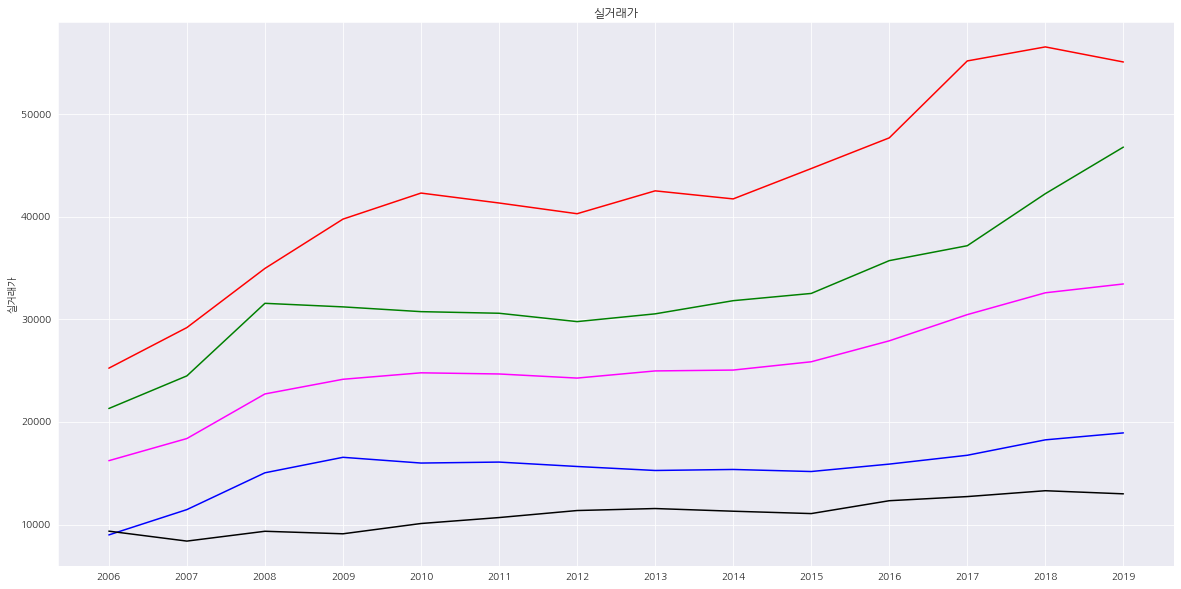

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
figure, (ax1) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=price, x=price.index, y='단독다가구(매매)_실거래가', ax=ax1, color='red')
sns.lineplot(data=price, x=price.index, y='아파트(매매)_실거래가', ax=ax1, color='green')
sns.lineplot(data=price, x=price.index, y='연립다세대(매매)_실거래가', ax=ax1, color='blue')
sns.lineplot(data=price, x=price.index, y='오피스텔(매매)_실거래가', ax=ax1, color='black')
sns.lineplot(data=price, x=price.index, y='평균실거래가', ax=ax1, color='magenta')

sns.set_style("darkgrid")
ax1.set(ylabel='실거래가', title ="실거래가")

-  단독다가구(매매)_실거래가: 빨간선

- 아파트(매매)_실거래가: 초록선

- 평균실거래가: 마젠타선

- 연립다세대(매매)_실거래가: 파란선

- 오피스텔(매매)_실거래가: 검정선

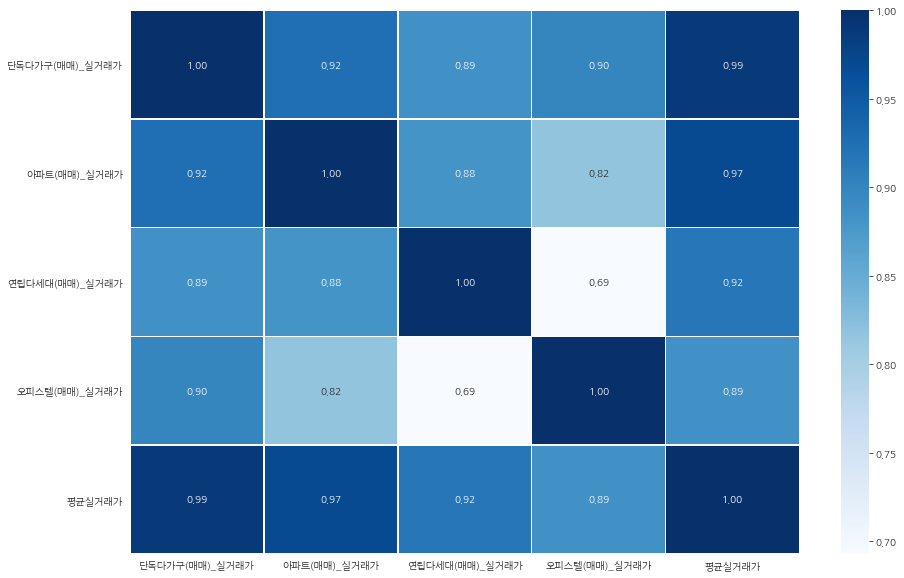

In [104]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(15,10))
sns.heatmap(data=price.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

인구이동과 실거래가 EDA
--

[Text(0, 0.5, '평균실거래가와 총전입'), Text(0.5, 1.0, '평균실거래가와 총전입')]

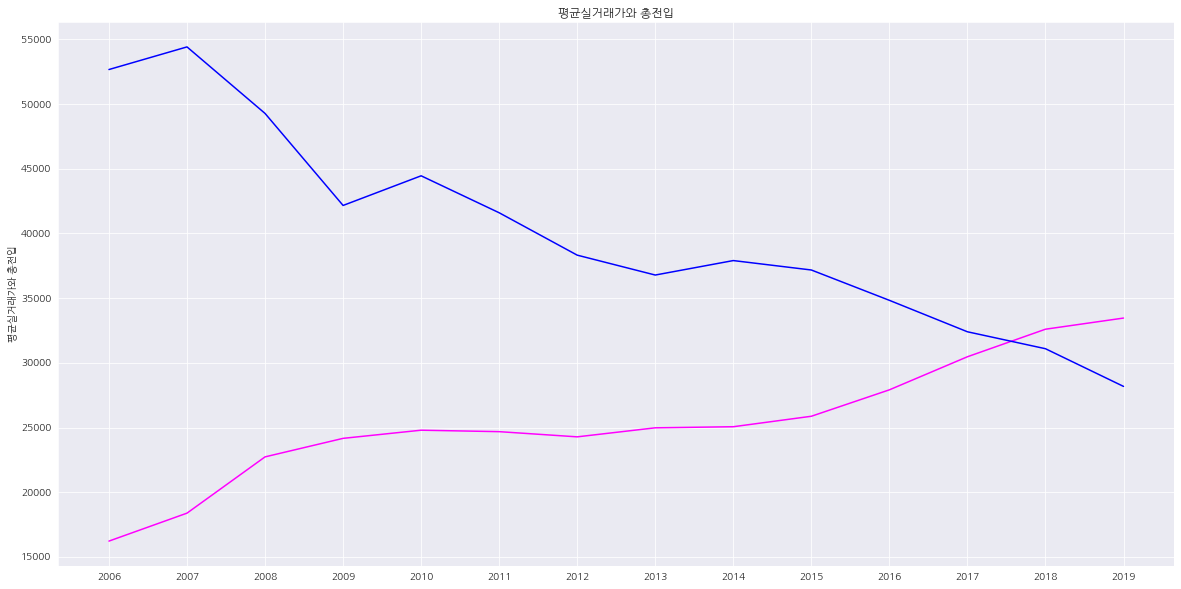

In [105]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=price, x=gangbuk.index, y='평균실거래가', ax=ax1, color='magenta')
sns.lineplot(data=gangbuk, x=gangbuk.index, y='총전입', ax=ax1, color='blue')

sns.set_style("darkgrid")
ax1.set(ylabel='평균실거래가와 총전입', title ="평균실거래가와 총전입")

- 평균실거래가: 마젠타색 선

- 총전입: 파란 선

전입인구가 줄어들수록 가격이 올라가는 경향을 보인다.

In [106]:
gangbuk['총전출(절대값)']=-1*(gangbuk['총전출'].values)

[Text(0, 0.5, '평균실거래가와 총전출'), Text(0.5, 1.0, '평균실거래가와 총전출')]

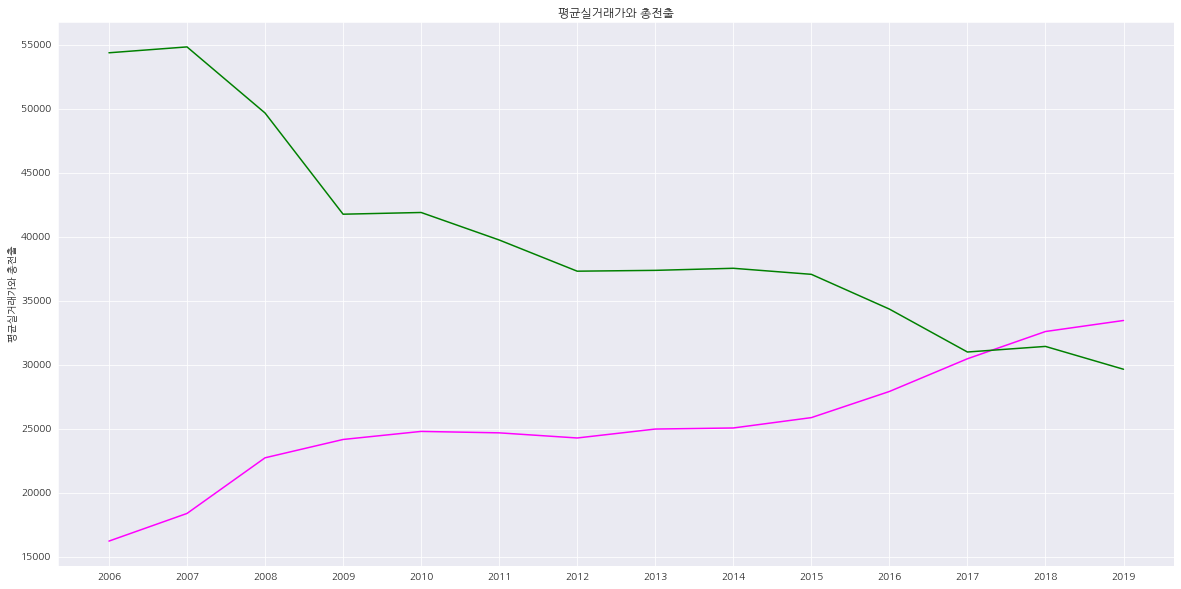

In [107]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=price, x=gangbuk.index, y='평균실거래가', ax=ax1, color='magenta')
sns.lineplot(data=gangbuk, x=gangbuk.index, y='총전출(절대값)', ax=ax1, color='green')

sns.set_style("darkgrid")
ax1.set(ylabel='평균실거래가와 총전출', title ="평균실거래가와 총전출")

- 평균실거래가: 마젠타색 선

- 총전출(절대값): 초록색 선

총 전출량도 평균실거래가와 반비례 경향을 보인다.

[Text(0, 0.5, '평균실거래가와 총편차'), Text(0.5, 1.0, '평균실거래가와 총편차')]

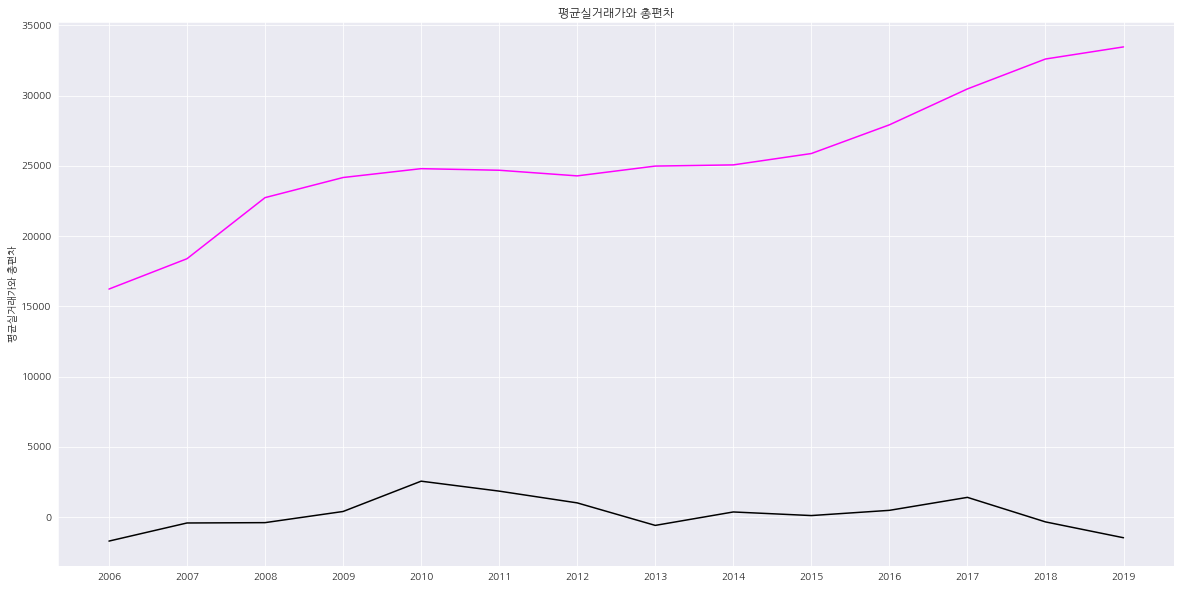

In [109]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=price, x=gangbuk.index, y='평균실거래가', ax=ax1, color='magenta')
sns.lineplot(data=gangbuk, x=gangbuk.index, y='총편차', ax=ax1, color='black')

sns.set_style("darkgrid")
ax1.set(ylabel='평균실거래가와 총편차', title ="평균실거래가와 총편차")

- 총편차: 검정색 선

- 평균 실거래가: 마젠타색 선

크게 상관이 있어보이지는 않는다.


머신러닝 적용하기
--

In [146]:
data=gangbuk.copy()

In [147]:
target=price['평균실거래가']

In [151]:
data.drop([ '단독다가구(매매)_실거래가',
       '아파트(매매)_실거래가', '연립다세대(매매)_실거래가', '오피스텔(매매)_실거래가', '평균실거래가',
       '총전출(절대값)'], axis=1, inplace=True)

In [152]:
x=data
y=target

In [153]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2006 to 2019
Data columns (total 78 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   _종로구(서울)   14 non-null     int64
 1   _중구(서울)    14 non-null     int64
 2   _용산구(서울)   14 non-null     int64
 3   _성동구(서울)   14 non-null     int64
 4   _광진구(서울)   14 non-null     int64
 5   _동대문구(서울)  14 non-null     int64
 6   _중랑구(서울)   14 non-null     int64
 7   _성북구(서울)   14 non-null     int64
 8   _강북구(서울)   14 non-null     int64
 9   _도봉구(서울)   14 non-null     int64
 10  _노원구(서울)   14 non-null     int64
 11  _은평구(서울)   14 non-null     int64
 12  _서대문구(서울)  14 non-null     int64
 13  _마포구(서울)   14 non-null     int64
 14  _양천구(서울)   14 non-null     int64
 15  _강서구(서울)   14 non-null     int64
 16  _구로구(서울)   14 non-null     int64
 17  _금천구(서울)   14 non-null     int64
 18  _영등포구(서울)  14 non-null     int64
 19  _동작구(서울)   14 non-null     int64
 20  _관악구(서울)   14 non-null     int64
 21  _서초구(서울)   14 non-

In [154]:
y=pd.DataFrame(y)
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2006 to 2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평균실거래가  14 non-null     float64
dtypes: float64(1)
memory usage: 864.0+ bytes


In [155]:
x_train=data.iloc[:-3]
x_test=data.iloc[-3:]

In [156]:
y_train=target.iloc[:-3]
y_test=target.iloc[-3:]

In [157]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2006 to 2016
Data columns (total 78 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   _종로구(서울)   11 non-null     int64
 1   _중구(서울)    11 non-null     int64
 2   _용산구(서울)   11 non-null     int64
 3   _성동구(서울)   11 non-null     int64
 4   _광진구(서울)   11 non-null     int64
 5   _동대문구(서울)  11 non-null     int64
 6   _중랑구(서울)   11 non-null     int64
 7   _성북구(서울)   11 non-null     int64
 8   _강북구(서울)   11 non-null     int64
 9   _도봉구(서울)   11 non-null     int64
 10  _노원구(서울)   11 non-null     int64
 11  _은평구(서울)   11 non-null     int64
 12  _서대문구(서울)  11 non-null     int64
 13  _마포구(서울)   11 non-null     int64
 14  _양천구(서울)   11 non-null     int64
 15  _강서구(서울)   11 non-null     int64
 16  _구로구(서울)   11 non-null     int64
 17  _금천구(서울)   11 non-null     int64
 18  _영등포구(서울)  11 non-null     int64
 19  _동작구(서울)   11 non-null     int64
 20  _관악구(서울)   11 non-null     int64
 21  _서초구(서울)   11 non-

In [158]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2017 to 2019
Data columns (total 78 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   _종로구(서울)   3 non-null      int64
 1   _중구(서울)    3 non-null      int64
 2   _용산구(서울)   3 non-null      int64
 3   _성동구(서울)   3 non-null      int64
 4   _광진구(서울)   3 non-null      int64
 5   _동대문구(서울)  3 non-null      int64
 6   _중랑구(서울)   3 non-null      int64
 7   _성북구(서울)   3 non-null      int64
 8   _강북구(서울)   3 non-null      int64
 9   _도봉구(서울)   3 non-null      int64
 10  _노원구(서울)   3 non-null      int64
 11  _은평구(서울)   3 non-null      int64
 12  _서대문구(서울)  3 non-null      int64
 13  _마포구(서울)   3 non-null      int64
 14  _양천구(서울)   3 non-null      int64
 15  _강서구(서울)   3 non-null      int64
 16  _구로구(서울)   3 non-null      int64
 17  _금천구(서울)   3 non-null      int64
 18  _영등포구(서울)  3 non-null      int64
 19  _동작구(서울)   3 non-null      int64
 20  _관악구(서울)   3 non-null      int64
 21  _서초구(서울)   3 non-nu

In [159]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [160]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2006 to 2016
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평균실거래가  11 non-null     float64
dtypes: float64(1)
memory usage: 176.0+ bytes


In [161]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2017 to 2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평균실거래가  3 non-null      float64
dtypes: float64(1)
memory usage: 48.0+ bytes


Regression(평균 실거래가)
--

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(x_train, y_train)), '입니다.')

rmse 는 4.648544452770703e-11 입니다.
r2 는 1.0 입니다.
train 스코어는 1.0 입니다.


In [164]:
y_test_pred=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(x_test, y_test)), '입니다.')

rmse 점수는 3972.793325699525 입니다.
r2 점수는 -8.99 입니다.
test 스코어는 -8.99346697944452 입니다.


- overfitting이 일어난다.

In [165]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 평균실거래가   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                nan
Time:                        05:53:38   Log-Likelihood:                 278.64
No. Observations:                  14   AIC:                            -529.3
Df Residuals:                       0   BIC:                            -520.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0230        inf          0        nan         nan         nan
_종로구(서울)       7.3099        inf          0        nan         nan         nan
_중구(서울)        3.8526        inf          0        nan         nan         nan
_용산구(서울)       1.8862        inf          0        nan         nan         nan
_성동구(서울)      -6.5876        inf         -0        nan         nan         nan
_광진구(서울)      -0.3193        inf         -0        nan         nan         nan
_동대문구(서울)     14.3599        inf          0        nan         nan         nan
_중랑구(서울)       3.1123        inf          0        nan         nan         nan
_성북구(서울)      -1.2549        inf         -0        nan         nan         nan
_강북구(서울)      -2.7555        inf         -0        nan         nan         nan
_도봉구(서울)      -7.0666        inf         -0        nan         nan         nan
_노원구(서울)      -7.0113        inf         -0        nan         nan         nan
_은평구(서울)      -0.3244        inf         -0        nan         nan         nan
_서대문구(서울)     -1.6726        inf         -0        nan         nan         nan
_마포구(서울)      -2.6265        inf         -0        nan         nan         nan
_양천구(서울)      -1.1299        inf         -0        nan         nan         nan
_강서구(서울)       0.6715        inf          0        nan         nan         nan
_구로구(서울)      -0.4252        inf         -0        nan         nan         nan
_금천구(서울)       2.9241        inf          0        nan         nan         nan
_영등포구(서울)      2.9813        inf          0        nan         nan         nan
_동작구(서울)       0.3326        inf          0        nan         nan         nan
_관악구(서울)       0.3630        inf          0        nan         nan         nan
_서초구(서울)       0.8776        inf          0        nan         nan         nan
_강남구(서울)      -0.8274        inf         -0        nan         nan         nan
_송파구(서울)      -3.4009        inf         -0        nan         nan         nan
_강동구(서울)      -0.8815        inf         -0        nan         nan         nan
종로구(전출)        0.5058        inf          0        nan         nan         nan
중구(전출)         1.0851        inf          0        nan         nan         nan
용산구(전출)       -0.3917        inf         -0        nan         nan         nan
성동구(전출)        2.2436        inf          0        nan         nan         nan
광진구(전출)       -2.3808        inf         -0        nan         nan         nan
동대문구(전출)      -9.4676        inf         -0        nan         nan         nan
중랑구(전출)       -4.3165        inf         -0        nan         nan         nan
성북구(전출)        1.7162        inf          0        nan         nan         nan
강북구(전출)        2.7555        inf          0        nan         nan         nan
도봉구(전출)        4.3739        inf          0        nan         nan         nan
노원

- 뭔가 망한 것 같다

전출량을 양수값으로 변환 한 뒤 다시 해보기

In [166]:
data.iloc[:, 25:50]=-1*(gangbuk.iloc[:, 25:50].values)

In [167]:
data=gangbuk.copy()
target=price['평균실거래가']
x=data
y=target

In [168]:
x_train=data.iloc[:-3]
x_test=data.iloc[-3:]

In [169]:
y_train=target.iloc[:-3]
y_test=target.iloc[-3:]

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(x_train, y_train)), '입니다.')

rmse 는 7.192801081867664e-12 입니다.
r2 는 1.0 입니다.
train 스코어는 1.0 입니다.


In [172]:
y_test_pred=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(x_test, y_test)), '입니다.')

rmse 점수는 4003.3531793513152 입니다.
r2 점수는 -9.15 입니다.
test 스코어는 -9.147803473034559 입니다.


In [173]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 평균실거래가   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                nan
Time:                        05:53:52   Log-Likelihood:                 298.31
No. Observations:                  14   AIC:                            -568.6
Df Residuals:                       0   BIC:                            -559.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0228        inf          0        nan         nan         nan
_종로구(서울)           7.2932        inf          0        nan         nan         nan
_중구(서울)            3.9062        inf          0        nan         nan         nan
_용산구(서울)           1.8656        inf          0        nan         nan         nan
_성동구(서울)          -6.5732        inf         -0        nan         nan         nan
_광진구(서울)          -0.3103        inf         -0        nan         nan         nan
_동대문구(서울)         14.2333        inf          0        nan         nan         nan
_중랑구(서울)           3.0958        inf          0        nan         nan         nan
_성북구(서울)          -1.3217        inf         -0        nan         nan         nan
_강북구(서울)          -2.8748        inf         -0        nan         nan         nan
_도봉구(서울)          -7.1484        inf         -0        nan         nan         nan
_노원구(서울)          -7.0723        inf         -0        nan         nan         nan
_은평구(서울)          -0.3253        inf         -0        nan         nan         nan
_서대문구(서울)         -1.6323        inf         -0        nan         nan         nan
_마포구(서울)          -2.6141        inf         -0        nan         nan         nan
_양천구(서울)          -1.1614        inf         -0        nan         nan         nan
_강서구(서울)           0.6758        inf          0        nan         nan         nan
_구로구(서울)          -0.4280        inf         -0        nan         nan         nan
_금천구(서울)           2.9150        inf          0        nan         nan         nan
_영등포구(서울)          2.9967        inf          0        nan         nan         nan
_동작구(서울)           0.3447        inf          0        nan         nan         nan
_관악구(서울)           0.3124        inf          0        nan         nan         nan
_서초구(서울)           0.8567        inf          0        nan         nan         nan
_강남구(서울)          -0.8554        inf         -0        nan         nan         nan
_송파구(서울)          -3.4220        inf         -0        nan         nan         nan
_강동구(서울)          -0.8903        inf         -0        nan         nan         nan
종로구(전출)            0.5002        inf          0        nan         nan         nan
중구(전출)             1.1211        inf          0        nan         nan         nan
용산구(전출)           -0.3366        inf         -0        nan         nan         nan
성동구(전출)            2.2713        inf          0        nan         nan         nan
광진구(전출)           -2.3562        inf         -0        nan         nan         nan
동대문구(전출)          -9.4266        inf         -0        nan         nan         nan
중랑구(전출)           -4.2622        inf         -0        nan         nan         nan
성북구(전출)            1.8434        inf          0        nan         nan         nan
강북구(전출)     

- 아무 의미가 없는 것 같다.

전입자료만 주고 맞춰보기

In [174]:
data=gangbuk.iloc[:, :25]
target=price['평균실거래가']
x=data
y=target

In [175]:
x_train=data.iloc[:-3]
x_test=data.iloc[-3:]

In [176]:
y_train=target.iloc[:-3]
y_test=target.iloc[-3:]

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(x_train, y_train)), '입니다.')

rmse 는 8.566999463330496e-12 입니다.
r2 는 1.0 입니다.
train 스코어는 1.0 입니다.


In [179]:
y_test_pred=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(x_test, y_test)), '입니다.')

rmse 점수는 3561.3762190354505 입니다.
r2 점수는 -7.03 입니다.
test 스코어는 -7.030820989237787 입니다.


- 전입량만 데이터를 주니까 오히려 rmse가 떨어지는 것을 확인 할 수 있었다.

In [180]:
type(x.values)

numpy.ndarray

In [181]:
type(y.values)

numpy.ndarray

In [182]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 평균실거래가   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                nan
Time:                        05:54:01   Log-Likelihood:                 306.33
No. Observations:                  14   AIC:                            -584.7
Df Residuals:                       0   BIC:                            -575.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3119        inf          0        nan         nan         nan
_종로구(서울)      52.6686        inf          0        nan         nan         nan
_중구(서울)        7.9092        inf          0        nan         nan         nan
_용산구(서울)      19.4233        inf          0        nan         nan         nan
_성동구(서울)       7.7902        inf          0        nan         nan         nan
_광진구(서울)      16.6691        inf          0        nan         nan         nan
_동대문구(서울)     45.0063        inf          0        nan         nan         nan
_중랑구(서울)      -7.4843        inf         -0        nan         nan         nan
_성북구(서울)       1.5414        inf          0        nan         nan         nan
_강북구(서울)      -1.0929        inf         -0        nan         nan         nan
_도봉구(서울)      -6.5712        inf         -0        nan         nan         nan
_노원구(서울)      -9.0958        inf         -0        nan         nan         nan
_은평구(서울)       5.1676        inf          0        nan         nan         nan
_서대문구(서울)     23.2723        inf          0        nan         nan         nan
_마포구(서울)     -53.0345        inf         -0        nan         nan         nan
_양천구(서울)     -21.0536        inf         -0        nan         nan         nan
_강서구(서울)      12.2750        inf          0        nan         nan         nan
_구로구(서울)     -16.5648        inf         -0        nan         nan         nan
_금천구(서울)       3.6889        inf          0        nan         nan         nan
_영등포구(서울)    -36.8667        inf         -0        nan         nan         nan
_동작구(서울)      23.8624        inf          0        nan         nan         nan
_관악구(서울)       3.6604        inf          0        nan         nan         nan
_서초구(서울)      -7.5029        inf         -0        nan         nan         nan
_강남구(서울)      34.5648        inf          0        nan         nan         nan
_송파구(서울)     -14.0093        inf         -0        nan         nan         nan
_강동구(서울)      -5.8818        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        4.090   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                2.135
Skew:                          -0.950   Prob(JB):                        0.344
Kurtosis:                       3.223   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lin_reg.params

const         0.311864
_종로구(서울)     52.668577
_중구(서울)       7.909170
_용산구(서울)     19.423264
_성동구(서울)      7.790228
_광진구(서울)     16.669088
_동대문구(서울)    45.006289
_중랑구(서울)     -7.484273
_성북구(서울)      1.541365
_강북구(서울)     -1.092894
_도봉구(서울)     -6.571157
_노원구(서울)     -9.095782
_은평구(서울)      5.167554
_서대문구(서울)    23.272313
_마포구(서울)    -53.034521
_양천구(서울)    -21.053569
_강서구(서울)     12.274988
_구로구(서울)    -16.564816
_금천구(서울)      3.688859
_영등포구(서울)   -36.866668
_동작구(서울)     23.862351
_관악구(서울)      3.660447
_서초구(서울)     -7.502874
_강남구(서울)     34.564815
_송파구(서울)    -14.009333
_강동구(서울)     -5.881802
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(x_train, y_train)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred=ridge.predict(x_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(x_train, y_train)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred=lasso.predict(x_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(x_train, y_train)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)
y_pred=elasticnet.predict(x_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(x_train, y_train)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 1.000
lr mse: 0.000
lr rmse: 0.000


ridge train score: 1.000
ridge mse: 0.000
ridge rmse: 0.015


lasso train score: 1.000
lasso mse: 0.037
lasso rmse: 0.192


elasticnet train score: 1.000
elasticnet mse: 0.213
elasticnet rmse: 0.462


In [ ]:
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lr test score: {:.3f}'.format(lr.score(x_test, y_test)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred=ridge.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('ridge test score: {:.3f}'.format(ridge.score(x_test, y_test)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred=lasso.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lasso test score: {:.3f}'.format(lasso.score(x_test, y_test)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)
y_pred=elasticnet.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('elasticnet test score: {:.3f}'.format(elasticnet.score(x_test, y_test)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr test score: -7.031
lr mse: 12683400.574
lr rmse: 3561.376


ridge test score: -7.031
ridge mse: 12683464.842
ridge rmse: 3561.385


lasso test score: -1.198
lasso mse: 3471202.162
lasso rmse: 1863.116


elasticnet test score: -2.122
elasticnet mse: 4930251.639
elasticnet rmse: 2220.417


- lasso를 사용하니까  rmse가 조금 더 내려가는 것을 확인 할 수 있었다.

Regression(단독다가구(매매)_실거래가)
--

In [ ]:
y=price['단독다가구(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(x_train, y_train)), '입니다.')

rmse 는 1.9529604722688337e-11 입니다.
r2 는 1.0 입니다.
train 스코어는 1.0 입니다.


In [ ]:
y_test_pred=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(x_test, y_test)), '입니다.')

rmse 점수는 6180.36366688292 입니다.
r2 점수는 -84.06 입니다.
test 스코어는 -84.05994528724801 입니다.


Regression(아파트다가구(매매)_실거래가)
--

In [ ]:
y=price['아파트(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(x_train, y_train)), '입니다.')

rmse 는 9.872026935044677e-12 입니다.
r2 는 1.0 입니다.
train 스코어는 1.0 입니다.


In [ ]:
y_test_pred=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(x_test, y_test)), '입니다.')

rmse 점수는 7109.9427138553065 입니다.
r2 점수는 -2.28 입니다.
test 스코어는 -2.2776102506831464 입니다.


Regression(연립다세대(매매)_실거래가)
--

In [ ]:
y=price['연립다세대(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(x_train, y_train)), '입니다.')

rmse 는 7.678243171701416e-12 입니다.
r2 는 1.0 입니다.
train 스코어는 1.0 입니다.


In [ ]:
y_test_pred=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(x_test, y_test)), '입니다.')

rmse 점수는 1982.4949196504754 입니다.
r2 점수는 -3.73 입니다.
test 스코어는 -3.7292066192162605 입니다.


Regression(오피스텔(매매)_실거래가)
--

In [ ]:
y=price['오피스텔(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(x_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(x_train, y_train)), '입니다.')

rmse 는 6.301164130741662e-12 입니다.
r2 는 1.0 입니다.
train 스코어는 1.0 입니다.


In [ ]:
y_test_pred=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(x_test, y_test)), '입니다.')

rmse 점수는 309.3898584544483 입니다.
r2 점수는 -0.76 입니다.
test 스코어는 -0.7564150661997908 입니다.


linear regression test rmse 정리: 
--

단독다가구(매매)_실거래가: 6180.36366688292

아파트(매매)_실거래가: 7109.9427138553065 

연립다세대(매매)_실거래가: 1982.4949196504754

오피스텔(매매)_실거래가: 309.3898584544483

평균실거래가:  3561.3762190354505

- 오피스텔(매매)_실거래가가 오차가 가장 적은 것을 확인 할 수 있었다.

Boosting
--

XGB

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
import tqdm
import timeit
from tqdm import tqdm
from tqdm import notebook
from tqdm import tqdm_notebook
from time import sleep

xgb_reg=xgb.XGBRegressor(random_state=42)


tqdm_notebook(xgb_reg.fit(x_train, y_train))
%time
XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))

[05:03:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
XGboosting train 점수는 1.000


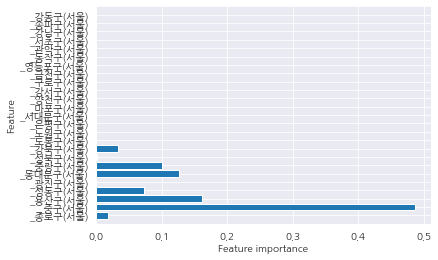

In [ ]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(xgb_reg)

In [ ]:
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

rmse 점수는 768.6304564174804 입니다.
r2 점수는 -9.84 입니다.
test 스코어는 -9.840521729965092 입니다.


Lightgbm

In [ ]:
from lightgbm import LGBMClassifier  
import lightgbm as lgbm

lgbm_reg = lgbm.LGBMRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

lgbm_reg.fit(x_train, y_train)
%time
LGBMscore_train = lgbm_reg.score(x_train, y_train) # train set 정확도

print('lightgbm train 점수는 {:.3f}'.format(LGBMscore_train))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
lightgbm train 점수는 -0.000


In [ ]:
lgbm_pred=lgbm_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, lgbm_pred)))
r2=round(lgbm_reg.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(lgbm_reg.score(x_test, y_test)), '입니다.')

rmse 점수는 2599.8376831019 입니다.
r2 점수는 -123.02 입니다.
test 스코어는 -123.02449712215525 입니다.


Cat boosting

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
import catboost as cb

cb_reg= cb.CatBoostRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

cb_reg.fit(x_train, y_train)
%time
CBscore_train = cb_reg.score(x_train, y_train) # train set 정확도

print('CatBoosting train 점수는 {:.3f}'.format(CBscore_train))

In [ ]:
cb_pred=cb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, cb_pred)))
r2=round(cb_reg.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(cb_reg.score(x_test, y_test)), '입니다.')

rmse 점수는 1287.3017799451827 입니다.
r2 점수는 -29.41 입니다.
test 스코어는 -29.407152042050726 입니다.


XGB:4555.846218182574 

LGBM: 8712.852047845698

Catboost: 5854.736212927487

- boosting 중에서는 XGB가 가장 rmse가 적으므로 XGB를 통해서 각 칼럼별로 예측을 진행하도록 하겠습니다.

XGB(단독다가구(매매)_실거래가)
--

In [ ]:
x=data
x_train=data.iloc[:-3]
x_test=data.iloc[-3:]

In [ ]:
y=price['단독다가구(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

In [ ]:
xgb_reg=xgb.XGBRegressor(random_state=42)


tqdm_notebook(xgb_reg.fit(x_train, y_train))
%time
XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))

[05:04:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
XGboosting train 점수는 1.000


In [ ]:
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')


rmse 점수는 8439.615912437162 입니다.
r2 점수는 -157.61 입니다.
test 스코어는 -157.61432310049236 입니다.


XGB(아파트(매매)_실거래가)
--

In [ ]:
y=price['아파트(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

In [ ]:
xgb_reg=xgb.XGBRegressor(random_state=42)


tqdm_notebook(xgb_reg.fit(x_train, y_train))
%time
XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))

In [ ]:
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

rmse 점수는 7602.228882604958 입니다.
r2 점수는 -2.75 입니다.
test 스코어는 -2.7472009879396317 입니다.


XGB(연립다세대(매매)_실거래가)
--

In [ ]:
y=price['연립다세대(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

In [ ]:
xgb_reg=xgb.XGBRegressor(random_state=42)


tqdm_notebook(xgb_reg.fit(x_train, y_train))
%time
XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))

In [ ]:
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')

rmse 점수는 2892.0043391727527 입니다.
r2 점수는 -9.06 입니다.
test 스코어는 -9.063800133416267 입니다.


XGB(오피스텔(매매)_실거래가)
--

In [ ]:
y=price['오피스텔(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

In [ ]:
xgb_reg=xgb.XGBRegressor(random_state=42)


tqdm_notebook(xgb_reg.fit(x_train, y_train))
%time
XGBscore_train = xgb_reg.score(x_train, y_train) # train set 정확도

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))

In [ ]:
xgb_pred=xgb_reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, xgb_pred)))
r2=round(xgb_reg.score(x_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(xgb_reg.score(x_test, y_test)), '입니다.')



rmse 점수는 768.6304564174804 입니다.
r2 점수는 -9.84 입니다.
test 스코어는 -9.840521729965092 입니다.


XGB test rmse 정리:
--

단독다가구(매매)_실거래가:  8439.615912437162

아파트(매매)_실거래가: 7602.228882604958

연립다세대(매매)_실거래가: 2892.0043391727527

오피스텔(매매)_실거래가:  768.6304564174804

평균실거래가: 4555.846218182574

오피스텔(매매)_실거래가 rmse가 가장 적은 것을 확인 할 수 있다.

Prophet
--

In [ ]:
import datetime
x_train.index=pd.to_datetime(x_train.index)

In [ ]:
x_train['ds']=x_train.index
x_train['y']=y_train

In [ ]:
x_train

"(구분, 전출지 행정구역)",_종로구(서울),_중구(서울),_용산구(서울),_성동구(서울),_광진구(서울),_동대문구(서울),_중랑구(서울),_성북구(서울),_강북구(서울),_도봉구(서울),_노원구(서울),_은평구(서울),_서대문구(서울),_마포구(서울),_양천구(서울),_강서구(서울),_구로구(서울),_금천구(서울),_영등포구(서울),_동작구(서울),_관악구(서울),_서초구(서울),_강남구(서울),_송파구(서울),_강동구(서울),ds,y
2006-01-01,692,438,520,842,724,1237,987,6488,23939,6227,3539,705,618,580,384,579,335,157,360,509,667,430,604,642,462,2006-01-01,9356.390411
2007-01-01,799,468,462,739,607,1208,935,8343,25215,6117,3074,720,530,572,288,424,312,168,391,421,606,416,546,552,500,2007-01-01,8386.584270
2008-01-01,724,516,376,1062,558,1318,851,6361,22864,5752,2728,684,596,675,261,408,281,146,355,411,510,340,507,524,465,2008-01-01,9344.366120
2009-01-01,695,404,401,682,503,1322,826,5257,18151,5644,2700,554,426,536,324,414,286,140,290,394,517,345,457,492,402,2009-01-01,9097.699187
2010-01-01,731,544,474,620,605,1114,922,6107,18785,5393,2807,538,627,555,296,562,311,164,375,437,575,348,506,579,478,2010-01-01,10101.358491
2011-01-01,584,392,429,771,520,1163,790,5844,17960,4887,2670,504,447,456,301,421,285,170,345,377,495,308,536,482,460,2011-01-01,10681.206349
2012-01-01,698,396,338,702,481,1001,717,5155,16987,4392,2310,419,335,462,251,386,248,154,309,337,484,298,512,557,393,2012-01-01,11366.444444
2013-01-01,608,356,366,572,448,939,663,5170,16985,4153,2135,453,310,345,187,310,213,150,299,333,386,277,406,380,341,2013-01-01,11560.956522
2014-01-01,592,310,353,516,434,832,643,6274,17353,4087,2086,472,351,345,175,306,198,117,230,301,444,267,454,400,363,2014-01-01,11300.128205
2015-01-01,545,353,332,483,444,981,731,5839,17050,4148,1998,470,303,387,180,310,195,120,224,300,426,226,441,368,321,2015-01-01,11069.320000


In [ ]:
train=x_train[['ds','y']]

In [ ]:
train

"(구분, 전출지 행정구역)",ds,y
2006-01-01,2006-01-01,9356.390411
2007-01-01,2007-01-01,8386.584270
2008-01-01,2008-01-01,9344.366120
2009-01-01,2009-01-01,9097.699187
2010-01-01,2010-01-01,10101.358491
2011-01-01,2011-01-01,10681.206349
2012-01-01,2012-01-01,11366.444444
2013-01-01,2013-01-01,11560.956522
2014-01-01,2014-01-01,11300.128205
2015-01-01,2015-01-01,11069.320000


In [ ]:
from fbprophet import Prophet

model=Prophet()
model.fit(train)
future=model.make_future_dataframe(periods=3, freq='Y')
forecast=model.predict(future)

In [ ]:
pred=forecast.iloc[-3:, -1:]

In [ ]:
pred

,yhat
11,12751.993343
12,13379.525126
13,14088.573164


In [ ]:
rmse=(np.sqrt(mean_squared_error(y_test, pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 633.7533357720866 입니다.


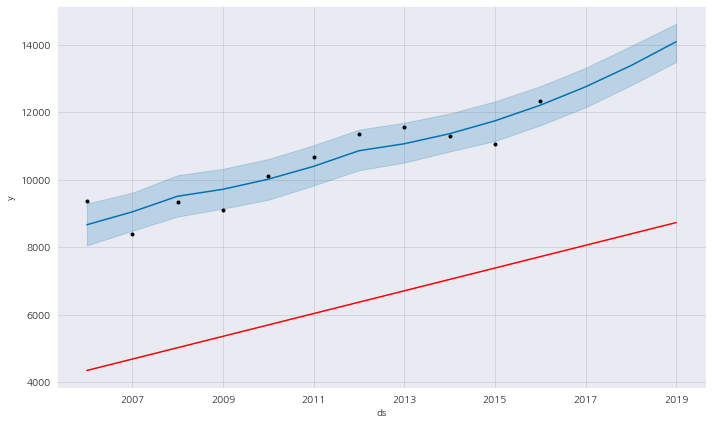

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly

fig1=model.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model, forecast)

파란색 선이 모델이 예측한 값, 검정색 점이 실제값

빨간 실 선은 트렌드를 의미한다.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, '실거래가'), Text(0.5, 1.0, '실거래가')]

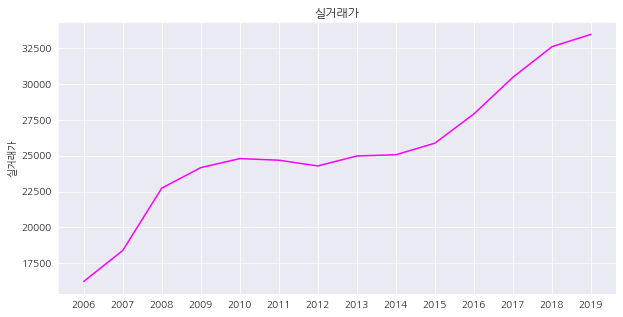

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
figure, (ax1) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(10,5)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=price, x=price.index, y='평균실거래가', ax=ax1, color='magenta')

sns.set_style("darkgrid")
ax1.set(ylabel='실거래가', title ="실거래가")

- 실제 값의 년별 변화

Prophet(단독다가구(매매)_실거래가)
--

In [ ]:
y=price['단독다가구(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

In [ ]:
import datetime
x_train.index=pd.to_datetime(x_train.index)

In [ ]:
x_train['ds']=x_train.index
x_train['y']=y_train

In [ ]:
train=x_train[['ds','y']]

In [ ]:
from fbprophet import Prophet

model=Prophet()
model.fit(train)
future=model.make_future_dataframe(periods=3, freq='Y')
forecast=model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [ ]:
pred=forecast.iloc[-3:, -1:]

In [ ]:
pred

,yhat
11,49872.906902
12,52390.006383
13,55294.125219


In [ ]:
rmse=(np.sqrt(mean_squared_error(y_test, pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 3917.371053202434 입니다.


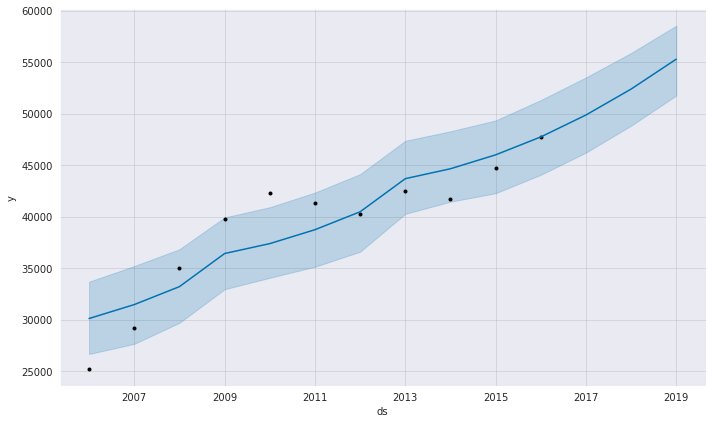

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly

fig1=model.plot(forecast)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, '실거래가'), Text(0.5, 1.0, '실거래가')]

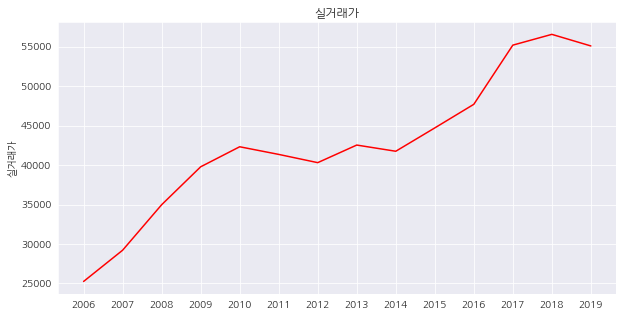

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
figure, (ax1) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(10,5)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=price, x=price.index, y='단독다가구(매매)_실거래가', ax=ax1, color='red')

sns.set_style("darkgrid")
ax1.set(ylabel='실거래가', title ="실거래가")

- 실제 가격의 변화

Prophet(아파트(매매)_실거래가)
--

In [ ]:
y=price['아파트(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

import datetime
x_train.index=pd.to_datetime(x_train.index)

x_train['ds']=x_train.index
x_train['y']=y_train

train=x_train[['ds','y']]

In [ ]:
from fbprophet import Prophet

model=Prophet()
model.fit(train)
future=model.make_future_dataframe(periods=3, freq='Y')
forecast=model.predict(future)

In [ ]:
pred=forecast.iloc[-3:, -1:]

In [ ]:
rmse=(np.sqrt(mean_squared_error(y_test, pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 2709.3002513570636 입니다.


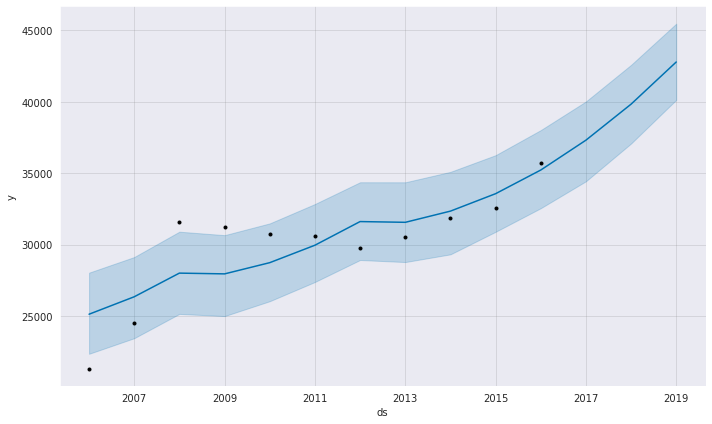

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly

fig1=model.plot(forecast)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, '실거래가'), Text(0.5, 1.0, '실거래가')]

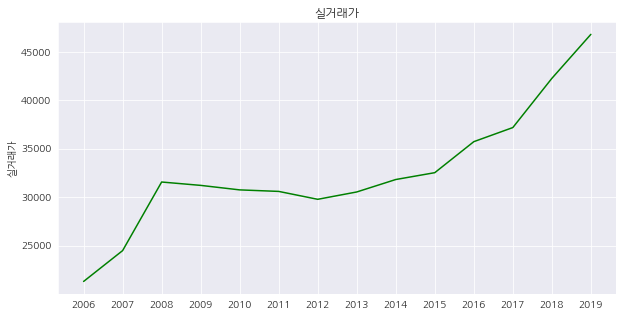

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, (ax1) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(10,5)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=price, x=price.index, y='아파트(매매)_실거래가', ax=ax1, color='green')

sns.set_style("darkgrid")
ax1.set(ylabel='실거래가', title ="실거래가")

- 실제 가격의 변화

Prophet(연립다세대(매매)_실거래가)
--

In [ ]:
y=price['연립다세대(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

import datetime
x_train.index=pd.to_datetime(x_train.index)

x_train['ds']=x_train.index
x_train['y']=y_train

train=x_train[['ds','y']]

In [ ]:
from fbprophet import Prophet

model=Prophet()
model.fit(train)
future=model.make_future_dataframe(periods=3, freq='Y')
forecast=model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [ ]:
pred=forecast.iloc[-3:, -1:]

In [ ]:
rmse=(np.sqrt(mean_squared_error(y_test, pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 375.9013478049518 입니다.


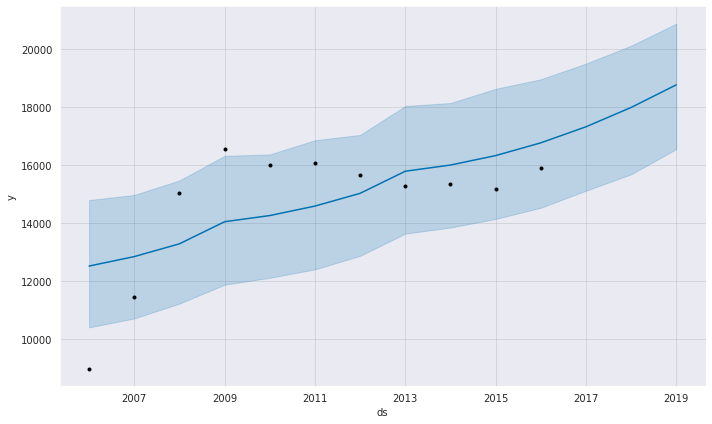

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly

fig1=model.plot(forecast)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, '실거래가'), Text(0.5, 1.0, '실거래가')]

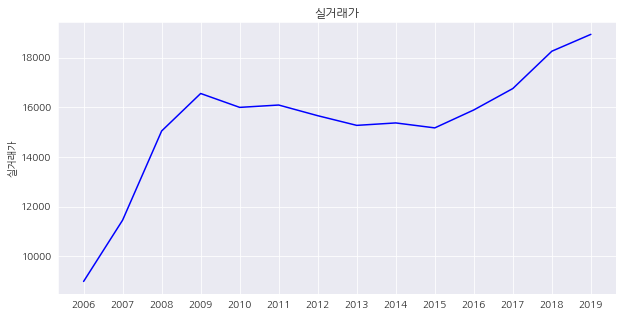

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
figure, (ax1) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(10,5)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=price, x=price.index, y='연립다세대(매매)_실거래가', ax=ax1, color='blue')

sns.set_style("darkgrid")
ax1.set(ylabel='실거래가', title ="실거래가")

- 실제 가격의 변화

Prophet(오피스텔(매매)_실거래가)
--

In [ ]:
y=price['오피스텔(매매)_실거래가']

In [ ]:
y_train=y.iloc[:-3]
y_test=y.iloc[-3:]

import datetime
x_train.index=pd.to_datetime(x_train.index)

x_train['ds']=x_train.index
x_train['y']=y_train

train=x_train[['ds','y']]

In [ ]:
from fbprophet import Prophet

model=Prophet()
model.fit(train)
future=model.make_future_dataframe(periods=3, freq='Y')
forecast=model.predict(future)

In [ ]:
pred=forecast.iloc[-3:, -1:]

In [ ]:
rmse=(np.sqrt(mean_squared_error(y_test, pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 633.7533357720866 입니다.


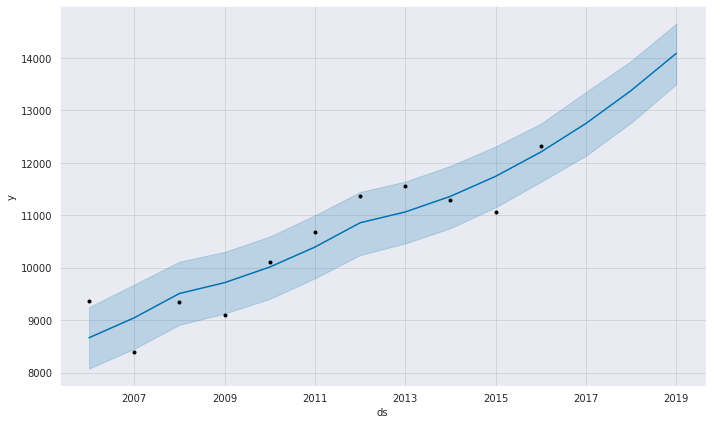

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly

fig1=model.plot(forecast)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[Text(0, 0.5, '실거래가'), Text(0.5, 1.0, '실거래가')]

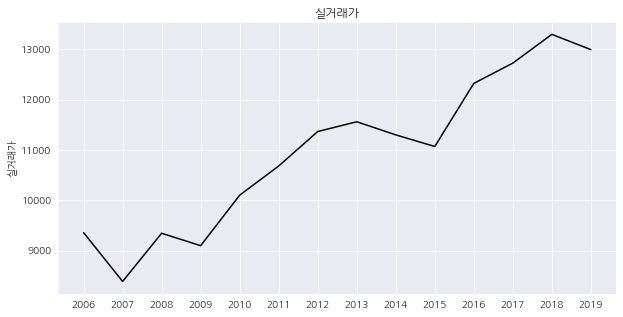

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
figure, (ax1) = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(10,5)
plt.rcParams['font.family'] = 'NanumGothic'

sns.lineplot(data=price, x=price.index, y='오피스텔(매매)_실거래가', ax=ax1, color='black')

sns.set_style("darkgrid")
ax1.set(ylabel='실거래가', title ="실거래가")

- 실제 가격의 변화

Prophet test rmse 정리:
--
단독다가구(매매)_실거래가:  3917.371053202434

아파트(매매)_실거래가: 2709.3002513570636

연립다세대(매매)_실거래가: 375.9013478049518

오피스텔(매매)_실거래가: 633.7533357720866

평균실거래가:  960.0560731828024

- 연립다세대(매매)_실거래가가 오차가 가장 적다.

Neural Prophet
--

In [ ]:
!pip install neuralprophet

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
import pandas as pd
price=pd.read_csv('price.csv')

In [ ]:
price['Unnamed: 0']=price['Unnamed: 0'].values.astype('str')

In [ ]:
import datetime
price['ds']=pd.to_datetime(price['Unnamed: 0'])

In [ ]:
price['y']=price['평균실거래가']

In [ ]:
price.columns

Index(['Unnamed: 0', '단독다가구(매매)_실거래가', '아파트(매매)_실거래가', '연립다세대(매매)_실거래가',
       '오피스텔(매매)_실거래가', '평균실거래가', 'ds', 'y'],
      dtype='object')

In [ ]:
price.drop(['Unnamed: 0', '단독다가구(매매)_실거래가', '아파트(매매)_실거래가', '연립다세대(매매)_실거래가',
       '오피스텔(매매)_실거래가', '평균실거래가'], axis=1, inplace=True)

In [ ]:
train=price.iloc[:-3, :]

In [ ]:
test=price.iloc[-3:, :]

In [ ]:
from neuralprophet import NeuralProphet

model=NeuralProphet()
model.fit(train, freq='Y')
future=model.make_future_dataframe(train, periods=3)
forecast=model.predict(future)

In [ ]:
pred=forecast['yhat1']

In [ ]:
pred

0    28428.660156
1    29429.429688
2    30429.707031
Name: yhat1, dtype: float64

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error

rmse=(np.sqrt(mean_squared_error(test['y'], pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 2793.02609413951 입니다.


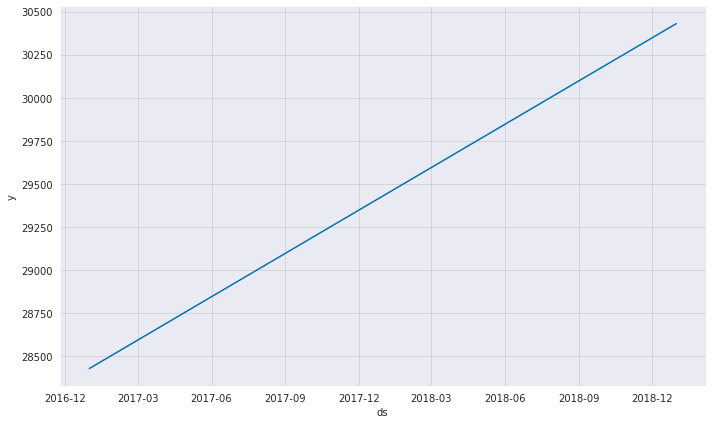

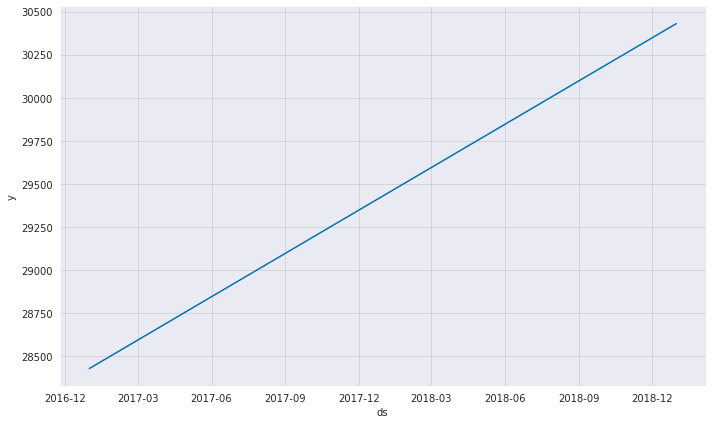

In [ ]:
model.plot(forecast)

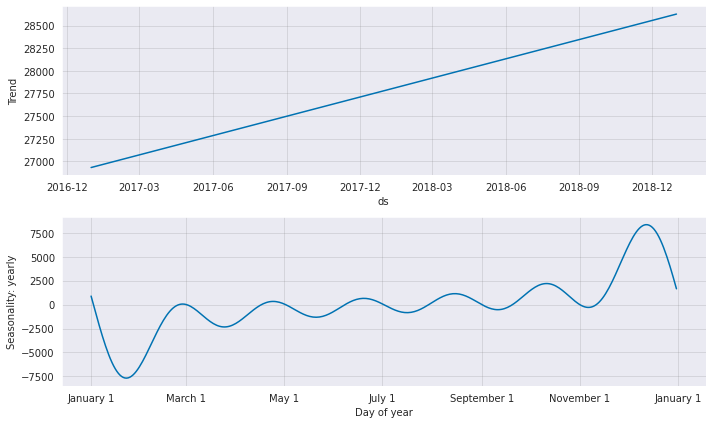

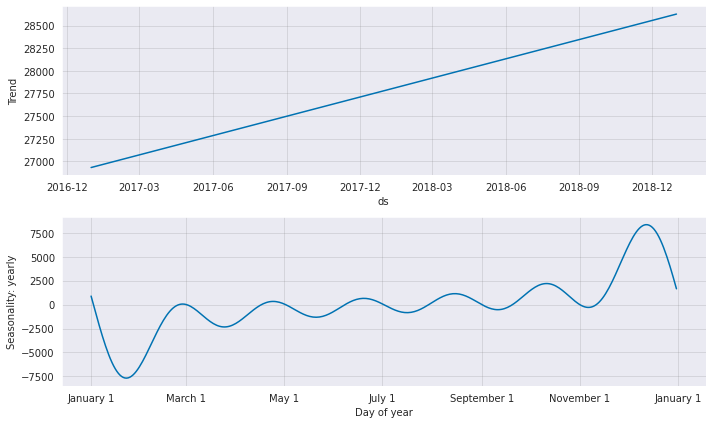

In [ ]:
model.plot_components(forecast)

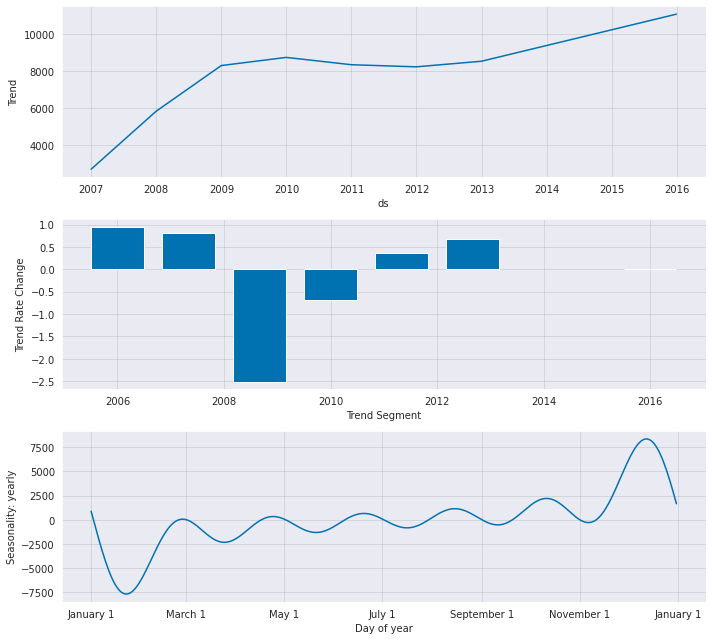

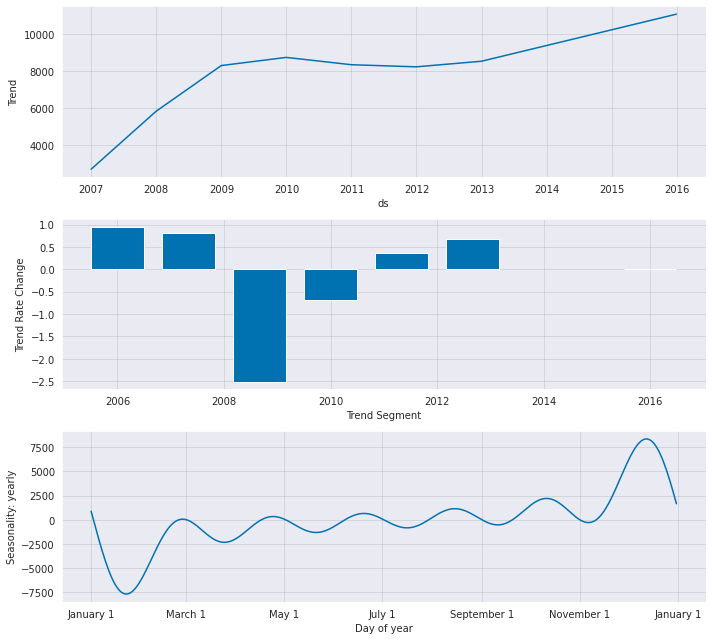

In [ ]:
model.plot_parameters()

Neural Prophet(단독다가구(매매)_실거래가)
--

In [ ]:
import pandas as pd
price=pd.read_csv('price.csv')

In [ ]:
price['Unnamed: 0']=price['Unnamed: 0'].values.astype('str')

In [ ]:
import datetime
price['ds']=pd.to_datetime(price['Unnamed: 0'])

In [ ]:
price

,Unnamed: 0,단독다가구(매매)_실거래가,아파트(매매)_실거래가,연립다세대(매매)_실거래가,오피스텔(매매)_실거래가,평균실거래가,ds
0,2006,25247.863864,21315.016769,8988.094103,9356.390411,16226.841287,2006-01-01
1,2007,29207.201139,24496.712995,11457.411378,8386.584270,18386.977445,2007-01-01
2,2008,34973.603406,31572.327853,15046.502797,9344.366120,22734.200044,2008-01-01
3,2009,39783.033755,31225.276573,16556.221217,9097.699187,24165.557683,2009-01-01
4,2010,42324.067449,30760.329489,15997.072545,10101.358491,24795.706993,2010-01-01
5,2011,41355.557740,30603.733706,16091.495359,10681.206349,24682.998288,2011-01-01
6,2012,40310.228324,29788.926708,15662.064826,11366.444444,24281.916076,2012-01-01
7,2013,42540.065539,30546.154255,15272.480231,11560.956522,24979.914137,2013-01-01
8,2014,41754.920382,31829.693211,15370.666124,11300.128205,25063.851981,2014-01-01
9,2015,44713.700000,32536.230890,15171.176495,11069.320000,25872.606846,2015-01-01


In [ ]:
price['y']=price['단독다가구(매매)_실거래가']

In [ ]:
price.drop(['Unnamed: 0', '단독다가구(매매)_실거래가', '아파트(매매)_실거래가', '연립다세대(매매)_실거래가',
       '오피스텔(매매)_실거래가', '평균실거래가'], axis=1, inplace=True)

In [ ]:
train=price.iloc[:-3, :]
test=price.iloc[-3:, :]

In [ ]:
from neuralprophet import NeuralProphet

model=NeuralProphet()
model.fit(train, freq='Y')
future=model.make_future_dataframe(train, periods=3)
forecast=model.predict(future)

In [ ]:
pred=forecast['yhat1']

import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error

rmse=(np.sqrt(mean_squared_error(test['y'], pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 5287.216776814786 입니다.


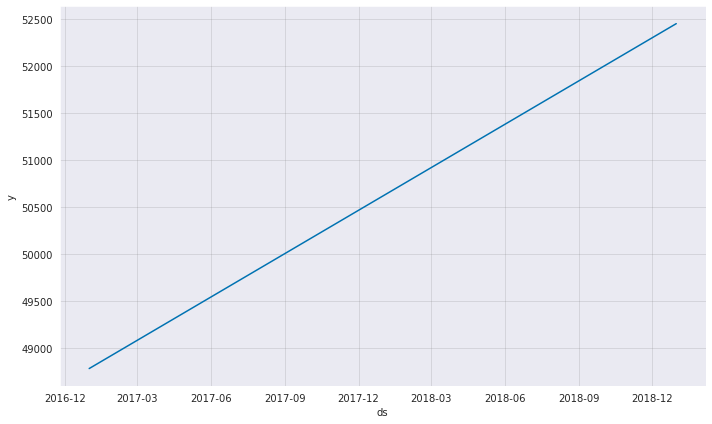

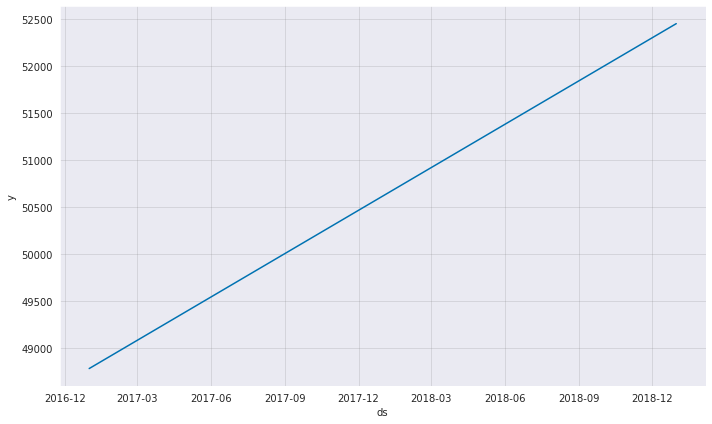

In [ ]:
model.plot(forecast)

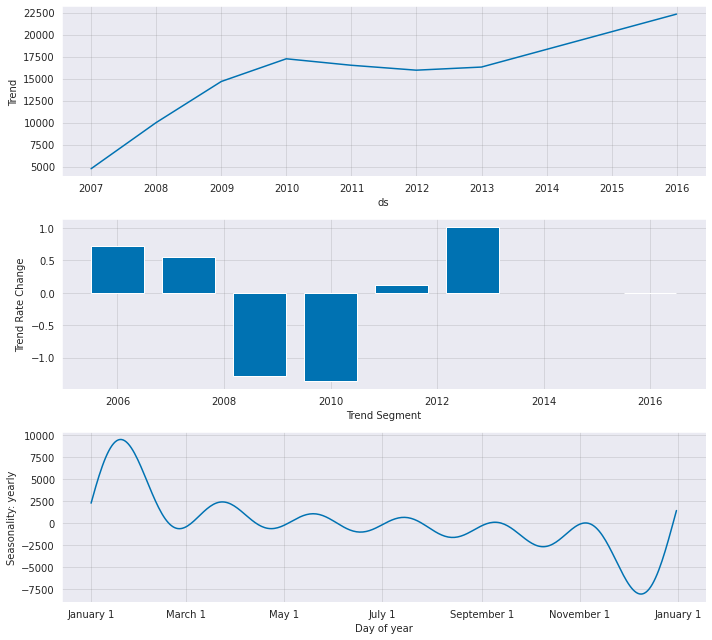

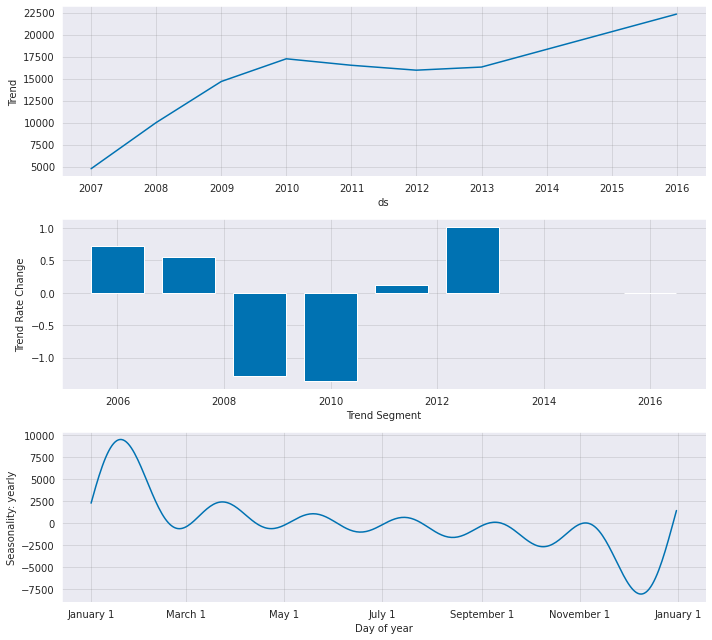

In [ ]:
model.plot_parameters()

Neural Prophet(아파트(매매)_실거래가)
--

In [ ]:
import pandas as pd
price=pd.read_csv('price.csv')

price['Unnamed: 0']=price['Unnamed: 0'].values.astype('str')

import datetime
price['ds']=pd.to_datetime(price['Unnamed: 0'])

In [ ]:
price['y']=price['아파트(매매)_실거래가']

price.drop(['Unnamed: 0', '단독다가구(매매)_실거래가', '아파트(매매)_실거래가', '연립다세대(매매)_실거래가',
       '오피스텔(매매)_실거래가', '평균실거래가'], axis=1, inplace=True)

train=price.iloc[:-3, :]
test=price.iloc[-3:, :]

In [ ]:
from neuralprophet import NeuralProphet

model=NeuralProphet()
model.fit(train, freq='Y')
future=model.make_future_dataframe(train, periods=3)
forecast=model.predict(future)

In [ ]:
pred=forecast['yhat1']

import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error

rmse=(np.sqrt(mean_squared_error(test['y'], pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 4150.676455166796 입니다.


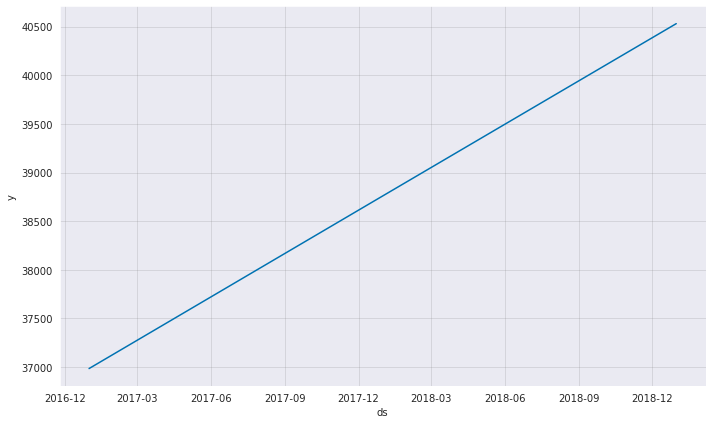

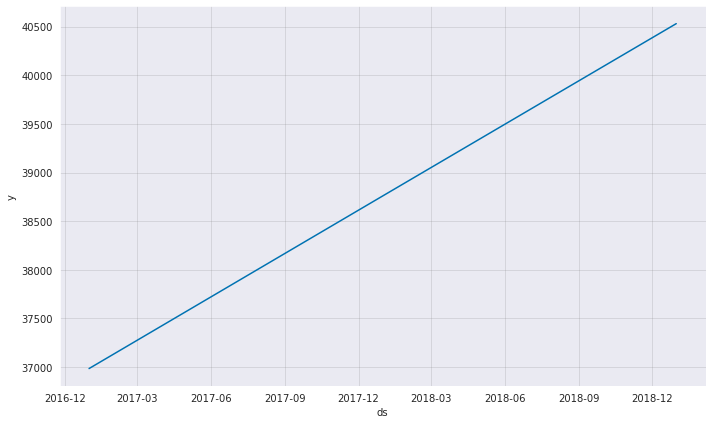

In [ ]:
model.plot(forecast)

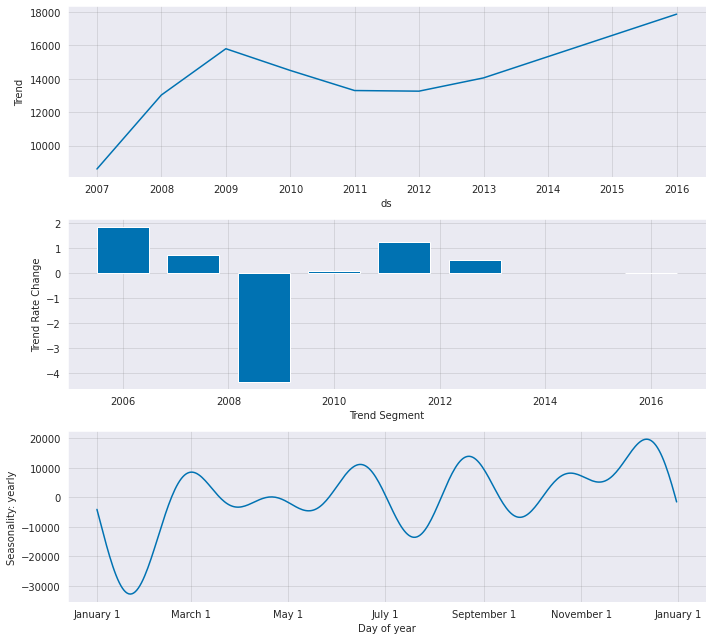

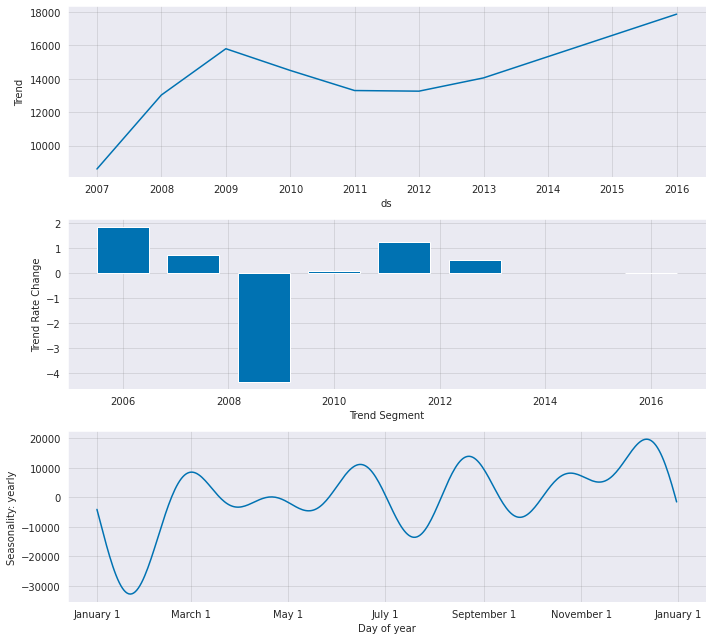

In [ ]:
model.plot_parameters()

Neural Prophet(연립다세대(매매)_실거래가)
--

In [ ]:
import pandas as pd
price=pd.read_csv('price.csv')

price['Unnamed: 0']=price['Unnamed: 0'].values.astype('str')

import datetime
price['ds']=pd.to_datetime(price['Unnamed: 0'])

In [ ]:
price['y']=price['연립다세대(매매)_실거래가']

price.drop(['Unnamed: 0', '단독다가구(매매)_실거래가', '아파트(매매)_실거래가', '연립다세대(매매)_실거래가',
       '오피스텔(매매)_실거래가', '평균실거래가'], axis=1, inplace=True)

train=price.iloc[:-3, :]
test=price.iloc[-3:, :]

In [ ]:
from neuralprophet import NeuralProphet

model=NeuralProphet()
model.fit(train, freq='Y')
future=model.make_future_dataframe(train, periods=3)
forecast=model.predict(future)

In [ ]:
pred=forecast['yhat1']

import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error

rmse=(np.sqrt(mean_squared_error(test['y'], pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 2103.217487173251 입니다.


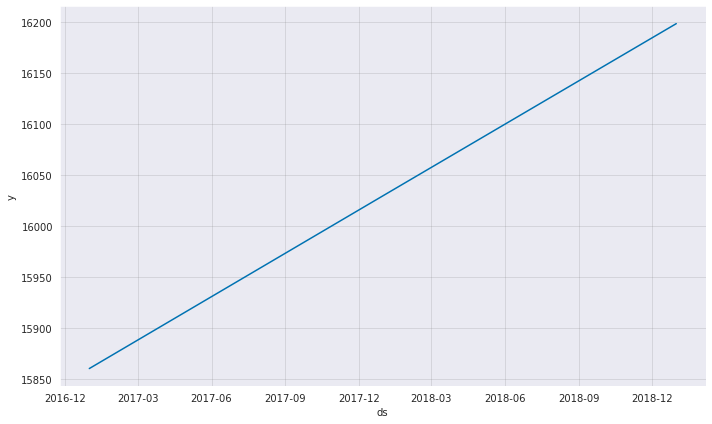

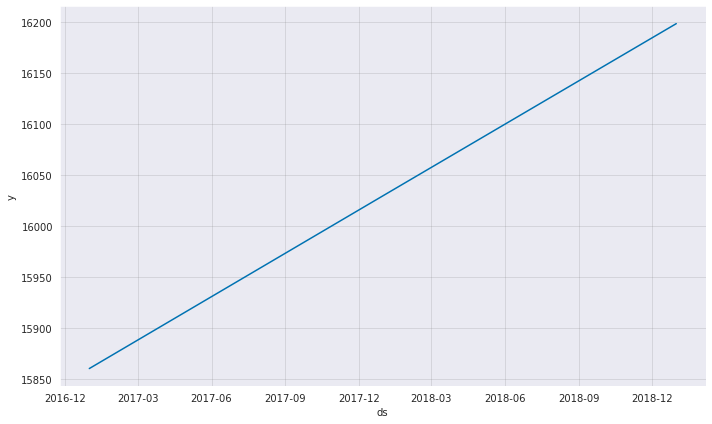

In [ ]:
model.plot(forecast)

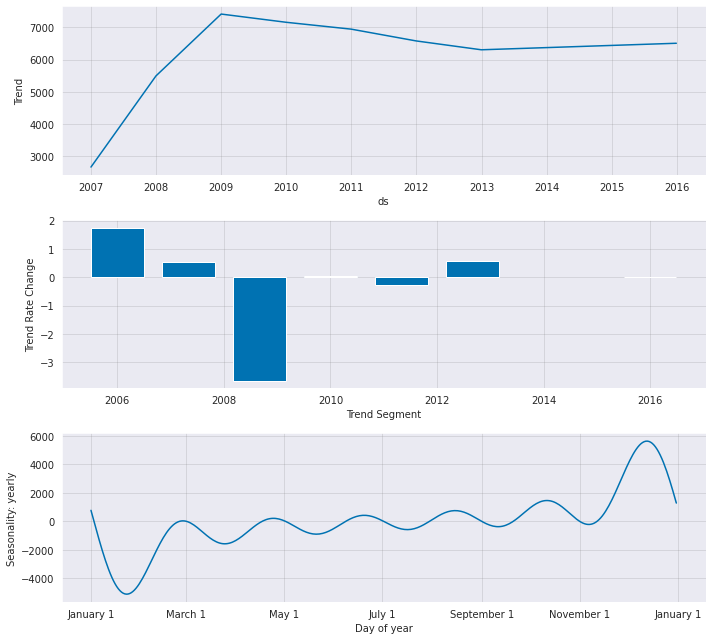

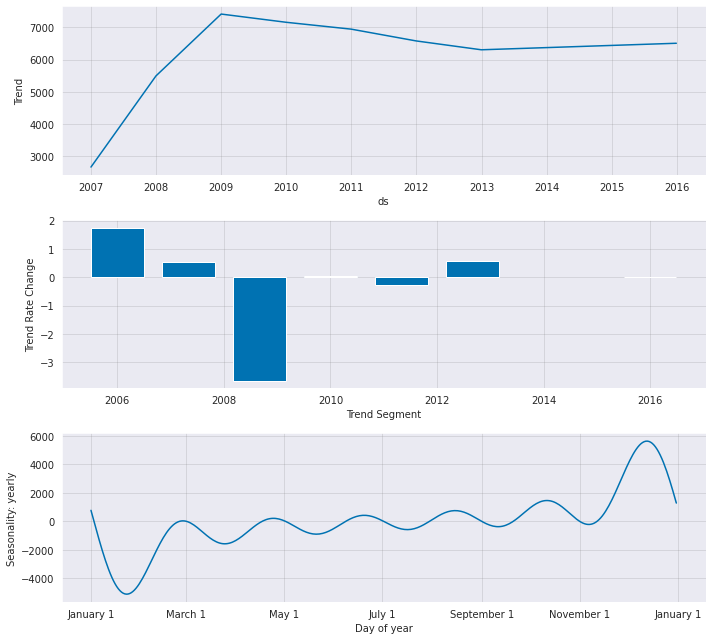

In [ ]:
model.plot_parameters()

Neural Prophet(오피스텔(매매)_실거래가)
--

In [ ]:
import pandas as pd
price=pd.read_csv('price.csv')

price['Unnamed: 0']=price['Unnamed: 0'].values.astype('str')

import datetime
price['ds']=pd.to_datetime(price['Unnamed: 0'])

In [ ]:
price['y']=price['오피스텔(매매)_실거래가']

price.drop(['Unnamed: 0', '단독다가구(매매)_실거래가', '아파트(매매)_실거래가', '연립다세대(매매)_실거래가',
       '오피스텔(매매)_실거래가', '평균실거래가'], axis=1, inplace=True)

train=price.iloc[:-3, :]
test=price.iloc[-3:, :]

In [ ]:
from neuralprophet import NeuralProphet

model=NeuralProphet()
model.fit(train, freq='Y')
future=model.make_future_dataframe(train, periods=3)
forecast=model.predict(future)

In [ ]:
pred=forecast['yhat1']

import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error

rmse=(np.sqrt(mean_squared_error(test['y'], pred)))
print('rmse 점수는', format(rmse), '입니다.')

rmse 점수는 696.3310356124514 입니다.


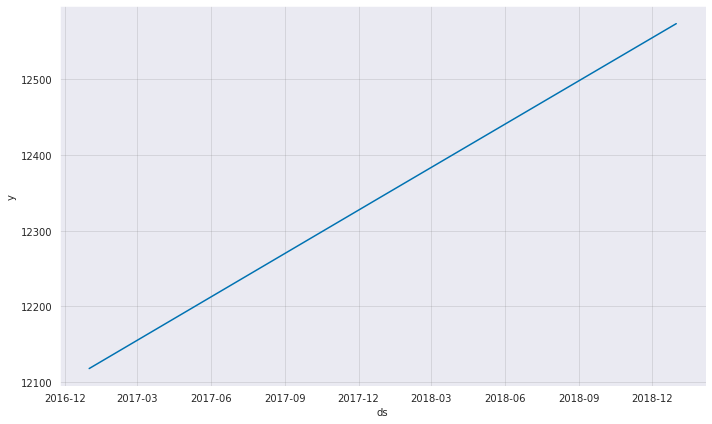

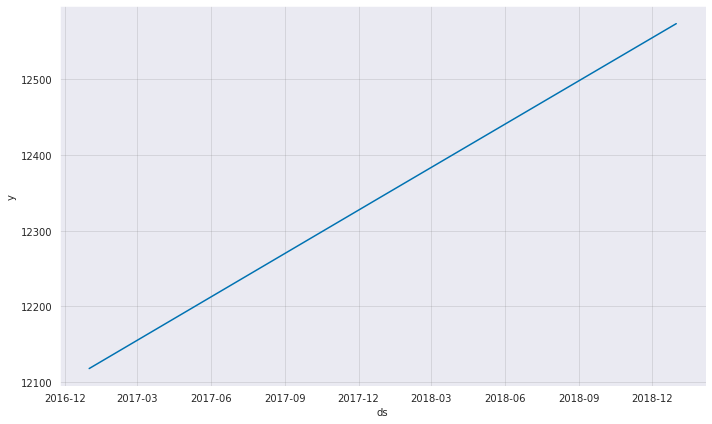

In [ ]:
model.plot(forecast)

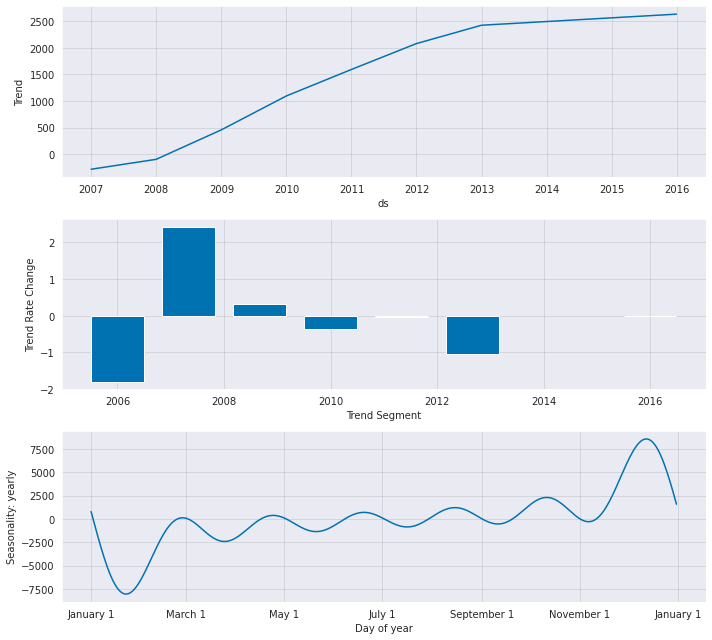

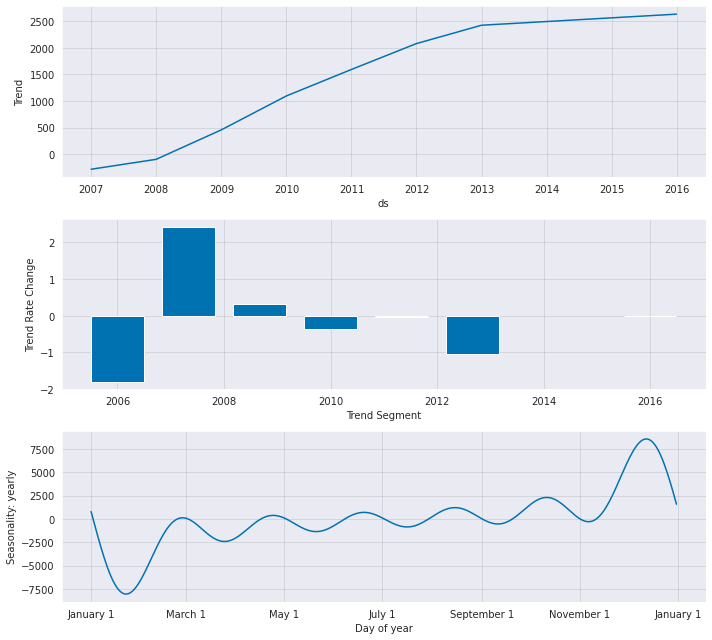

In [ ]:
model.plot_parameters()

Neural Prophet test rmse 정리:
--

단독다가구(매매)_실거래가: 5266.5215219830725

아파트(매매)_실거래가: 4274.987170591463

연립다세대(매매)_실거래가: 2198.3032971357825

오피스텔(매매)_실거래가: 663.4280943831822

평균실거래가: 2768.5574721276726

연립다세대(매매)_실거래가가 오차가 가장 적다.

총 정리
--

linear regression test rmse 정리: 
--

단독다가구(매매)_실거래가: 6180.36366688292

아파트(매매)_실거래가: 7109.9427138553065 

연립다세대(매매)_실거래가: 1982.4949196504754

오피스텔(매매)_실거래가: 309.3898584544483

평균실거래가:  3561.3762190354505

- 오피스텔(매매)_실거래가가 오차가 가장 적은 것을 확인 할 수 있었다.


XGB test rmse 정리:
--

단독다가구(매매)_실거래가: 8439.615912437162

아파트(매매)_실거래가: 7602.228882604958

연립다세대(매매)_실거래가: 2892.0043391727527

오피스텔(매매)_실거래가: 768.6304564174804

평균실거래가: 4555.846218182574

- 오피스텔(매매)_실거래가 rmse가 가장 적은 것을 확인 할 수 있다.

Prophet test rmse 정리:
--
단독다가구(매매)_실거래가:  3917.371053202434

아파트(매매)_실거래가: 2709.3002513570636

연립다세대(매매)_실거래가: 375.9013478049518

오피스텔(매매)_실거래가: 633.7533357720866

평균실거래가:  960.0560731828024

- 연립다세대(매매)_실거래가가 오차가 가장 적다.

Neural Prophet test rmse 정리:
--

단독다가구(매매)_실거래가: 5266.5215219830725

아파트(매매)_실거래가: 4274.987170591463

연립다세대(매매)_실거래가: 2198.3032971357825

오피스텔(매매)_실거래가: 663.4280943831822

평균실거래가: 2768.5574721276726

- 오피스텔(매매)_실거래가가 오차가 가장 적다

